# Caterpillar Tube Assembly Price Prediction

### General Overview

- A tube assembly consists of a tube and components. There are 11 types of components and a tube assembly can have any of these types in various quantities, or no components at all. In addition, the tube can be bent multiple times with a variable bend radius, and the tube ends can be prepared in various ways.

- Our original data consisted of 21 different csv files.


### Data Files Available

- train_set.csv and test_set.csv
  This file contains information on price quotes from our suppliers.

- bill_of_materials.csv
  This file contains the list of components, and the quantities, used on each tube assembly.

- specs.csv
  This file contains the list of unique specifications for the tube assembly. These can refer to materials, processes, rust protection, etc.

- tube_end_form.csv
  Some end forms are physically formed utilizing only the wall of the tube. These are the end forms.

- tube.csv
  This file contains information on tube assemblies.

- components.csv
  This file contains the list of all the components used. Component_type_id refers to the category under which each component falls under.

- comp_[type].csv
  These files contain the information for each component.

- type_[type].csv
  These files contain the names for each feature.

### Problem Statement
The goal of this project is to develop a regression model that predicts the quote price a supplier will provide for a tube assembly. This prediction will be based on historical data of past tube assembly quotes and other relevant features.

### Objectives
To analyze the historical data of tube assembly quotes provided by various suppliers.
To identify key factors that influence the quote prices of tube assemblies.
To build and validate a regression model that accurately predicts future quote prices for tube assemblies.

### Expected Outcomes
A regression model capable of predicting the quote price for a tube assembly with high accuracy.
Insights into the factors that most significantly affect the quote prices.
Recommendations for data-driven decision-making in supplier negotiations and cost management.

### Evaluation Metrics

The performance of the regression model will be evaluated using the following metrics:

- **Mean Absolute Error (MAE)**: Measures the average magnitude of errors in predictions.
- **Mean Squared Error (MSE)**: Measures the average of the squares of the errors.
- **Root Mean Squared Error (RMSE)**: Provides an aggregate measure of the model's prediction error.
- **R-squared (R²)**: Indicates the proportion of variance in the dependent variable that is predictable from the independent variables.

### Project Scope
This project will focus on developing and validating the regression model using historical quote data. Future enhancements may include integrating real-time data for dynamic pricing predictions and expanding the model to other components and assemblies used in Caterpillar's machinery.

By achieving these objectives, Caterpillar can better manage their supplier relationships, optimize procurement costs, and enhance their overall production efficiency.

### To Ignore warnings

In [179]:
import warnings

warnings.filterwarnings('ignore')

### Importing libraries for Data Operations.

In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Data Loading

In [181]:
bill_of_materials = pd.read_csv("./Data/bill_of_materials.csv")
comp_adaptor = pd.read_csv("./Data/comp_adaptor.csv")
comp_boss = pd.read_csv("./Data/comp_boss.csv")
comp_elbow = pd.read_csv("./Data/comp_elbow.csv")
comp_float = pd.read_csv("./Data/comp_float.csv")
comp_hfl = pd.read_csv("./Data/comp_hfl.csv")
comp_nut = pd.read_csv("./Data/comp_nut.csv")
comp_other = pd.read_csv("./Data/comp_other.csv")
comp_sleeve = pd.read_csv("./Data/comp_sleeve.csv")
comp_straight = pd.read_csv("./Data/comp_straight.csv")
comp_tee = pd.read_csv("./Data/comp_tee.csv")
comp_threaded = pd.read_csv("./Data/comp_threaded.csv")
components = pd.read_csv("./Data/components.csv")
specs = pd.read_csv("./Data/specs.csv")
test_set = pd.read_csv("./Data/test_set.csv")
train_set = pd.read_csv("./Data/train_set.csv")
tube = pd.read_csv("./Data/tube.csv")
tube_end_form = pd.read_csv("./Data/tube_end_form.csv")
type_component = pd.read_csv("./Data/type_component.csv")
type_connection = pd.read_csv("./Data/type_connection.csv")
type_end_form = pd.read_csv("./Data/type_end_form.csv")

In [182]:
# bill_of_materials
bill_of_materials.shape

(21198, 17)

In [183]:
bill_of_materials.head()

,tube_assembly_id,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,quantity_3,component_id_4,quantity_4,component_id_5,quantity_5,component_id_6,quantity_6,component_id_7,quantity_7,component_id_8,quantity_8
0,TA-00001,C-1622,2.0,C-1629,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TA-00002,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TA-00003,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TA-00004,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TA-00005,C-1624,1.0,C-1631,1.0,C-1641,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
bill_of_materials.isnull().sum().sum()

260242

In [185]:
bill_of_materials.isnull().sum()

tube_assembly_id        0
component_id_1       2049
quantity_1           2049
component_id_2       6412
quantity_2           6412
component_id_3      16407
quantity_3          16400
component_id_4      20591
quantity_4          20590
component_id_5      21106
quantity_5          21106
component_id_6      21172
quantity_6          21172
component_id_7      21191
quantity_7          21191
component_id_8      21197
quantity_8          21197
dtype: int64

In [186]:
# comp_adaptor
comp_adaptor.shape

(25, 20)

In [187]:
comp_adaptor

,component_id,component_type_id,adaptor_angle,overall_length,end_form_id_1,connection_type_id_1,length_1,thread_size_1,thread_pitch_1,nominal_size_1,end_form_id_2,connection_type_id_2,length_2,thread_size_2,thread_pitch_2,nominal_size_2,hex_size,unique_feature,orientation,weight
0,C-0005,CP-028,NaN,58.40,A-001,B-001,NaN,1.312,12.0,NaN,A-001,B-004,NaN,1.000,11.5,NaN,34.93,No,No,0.206
1,C-0006,CP-028,NaN,34.80,A-001,B-001,NaN,0.437,20.0,NaN,A-001,B-005,NaN,0.750,16.0,NaN,22.20,No,No,0.083
2,C-1435,CP-028,NaN,20.30,A-007,B-004,NaN,NaN,NaN,15.88,A-001,B-007,NaN,0.875,18.0,NaN,22.22,No,No,0.023
3,C-1546,CP-028,NaN,26.40,A-007,B-004,NaN,0.125,27.0,NaN,A-001,B-004,NaN,0.125,27.0,NaN,15.88,No,No,0.026
4,C-1583,CP-028,NaN,44.50,A-001,B-005,NaN,1.312,12.0,NaN,A-007,B-005,NaN,1.062,12.0,NaN,38.10,No,No,0.256
5,C-1634,CP-028,NaN,34.50,A-001,B-005,NaN,0.750,16.0,NaN,A-001,B-002,NaN,0.687,16.0,NaN,22.23,No,No,0.060
6,C-1975,CP-028,NaN,13.20,A-007,B-007,NaN,NaN,NaN,3.18,A-001,B-007,NaN,0.312,28.0,NaN,NaN,No,No,0.005
7,C-0428,CP-028,NaN,26.99,A-001,B-004,NaN,0.250,18.0,NaN,A-007,NaN,NaN,NaN,NaN,9.52,17.46,No,No,0.032
8,C-0443,CP-028,NaN,22.35,A-007,B-007,NaN,NaN,NaN,19.05,9999,9999,NaN,1.062,16.0,NaN,26.97,No,No,NaN
9,C-0823,CP-028,NaN,16.80,A-007,B-007,NaN,NaN,NaN,9.52,A-001,9999,NaN,0.625,18.0,9.52,15.75,No,No,0.014


In [188]:
comp_adaptor.isnull().sum().sum()

145

In [189]:
comp_adaptor.isnull().sum()

component_id             0
component_type_id        0
adaptor_angle           24
overall_length           1
end_form_id_1            0
connection_type_id_1     1
length_1                24
thread_size_1            8
thread_pitch_1           8
nominal_size_1          17
end_form_id_2            0
connection_type_id_2     1
length_2                24
thread_size_2            2
thread_pitch_2           2
nominal_size_2          23
hex_size                 8
unique_feature           0
orientation              0
weight                   2
dtype: int64

In [190]:
# component_type_id, end_form_id_1, connection_type_id_1, end_form_id_2, connection_type_id_2 - it is useless in all files.

# adaptor_angle - only one value.

# unique_feature, orientation - categorical description.

# C-1695 - has abnormal values. And only one tube assembly has it. So I'll drop it.

# C-0443 - has NaN weight. And it belongs to only one tube assembly, which has two components, both with NaN weight. So drop.

# Drop length_1 and length_2 after using becasue it of no use now

comp_adaptor.drop(['component_type_id', 'end_form_id_1', 'connection_type_id_1',
                   'end_form_id_2', 'connection_type_id_2', 'adaptor_angle',
                   'unique_feature', 'orientation', 'length_1', 'length_2'],
                  axis=1, inplace=True)

# C-1868 - It seems that for some reason overall_length wasn't calculated.
# I'll calculate it as a sum of length_1 and length_2.
comp_adaptor.loc[comp_adaptor['overall_length'].isnull(), 'overall_length'] = 93.50 # length_1 + length_2 = 65.5 + 28.0 = 93.5

# Dropping the component id of C-1695 and C-0443 which are the index of 8 and 21
comp_adaptor.drop(comp_adaptor.index[[8, 21]], inplace=True)


In [191]:
comp_adaptor.shape

(23, 10)

In [192]:
comp_adaptor

,component_id,overall_length,thread_size_1,thread_pitch_1,nominal_size_1,thread_size_2,thread_pitch_2,nominal_size_2,hex_size,weight
0,C-0005,58.40,1.312,12.0,NaN,1.000,11.5,NaN,34.93,0.206
1,C-0006,34.80,0.437,20.0,NaN,0.750,16.0,NaN,22.20,0.083
2,C-1435,20.30,NaN,NaN,15.88,0.875,18.0,NaN,22.22,0.023
3,C-1546,26.40,0.125,27.0,NaN,0.125,27.0,NaN,15.88,0.026
4,C-1583,44.50,1.312,12.0,NaN,1.062,12.0,NaN,38.10,0.256
5,C-1634,34.50,0.750,16.0,NaN,0.687,16.0,NaN,22.23,0.060
6,C-1975,13.20,NaN,NaN,3.18,0.312,28.0,NaN,NaN,0.005
7,C-0428,26.99,0.250,18.0,NaN,NaN,NaN,9.52,17.46,0.032
9,C-0823,16.80,NaN,NaN,9.52,0.625,18.0,9.52,15.75,0.014
10,C-0354,36.30,1.250,11.5,NaN,1.000,11.5,NaN,44.45,0.136


In [193]:
# comp_boss
comp_boss.shape

(147, 15)

In [194]:
comp_boss.head()

,component_id,component_type_id,type,connection_type_id,outside_shape,base_type,height_over_tube,bolt_pattern_long,bolt_pattern_wide,groove,base_diameter,shoulder_diameter,unique_feature,orientation,weight
0,C-0008,CP-018,Boss,B-005,Round,Flat Bottom,17.0,NaN,NaN,No,22.0,NaN,Yes,Yes,0.032
1,C-0009,CP-018,Boss,B-004,Round,Flat Bottom,13.0,NaN,NaN,No,25.0,NaN,No,Yes,0.033
2,C-0020,CP-018,Boss,B-005,Round,Saddle,28.4,NaN,NaN,No,35.0,NaN,Yes,Yes,0.070
3,C-0054,CP-018,Boss,B-005,Round,Saddle,27.1,NaN,NaN,No,NaN,NaN,Yes,Yes,0.180
4,C-0071,CP-018,Boss,B-005,Round,Shoulder,20.0,NaN,NaN,No,30.0,23.0,Yes,Yes,0.080


In [195]:
comp_boss.isnull().sum().sum()

532

In [196]:
comp_boss.isnull().sum()

component_id            0
component_type_id       0
type                   23
connection_type_id      0
outside_shape          23
base_type              23
height_over_tube        0
bolt_pattern_long     124
bolt_pattern_wide     130
groove                  0
base_diameter          90
shoulder_diameter     117
unique_feature          0
orientation             0
weight                  2
dtype: int64

In [197]:
# Keeping only important informations
comp_boss = comp_boss[['component_id', 'height_over_tube', 'weight']]
comp_boss.head()

,component_id,height_over_tube,weight
0,C-0008,17.0,0.032
1,C-0009,13.0,0.033
2,C-0020,28.4,0.070
3,C-0054,27.1,0.180
4,C-0071,20.0,0.080


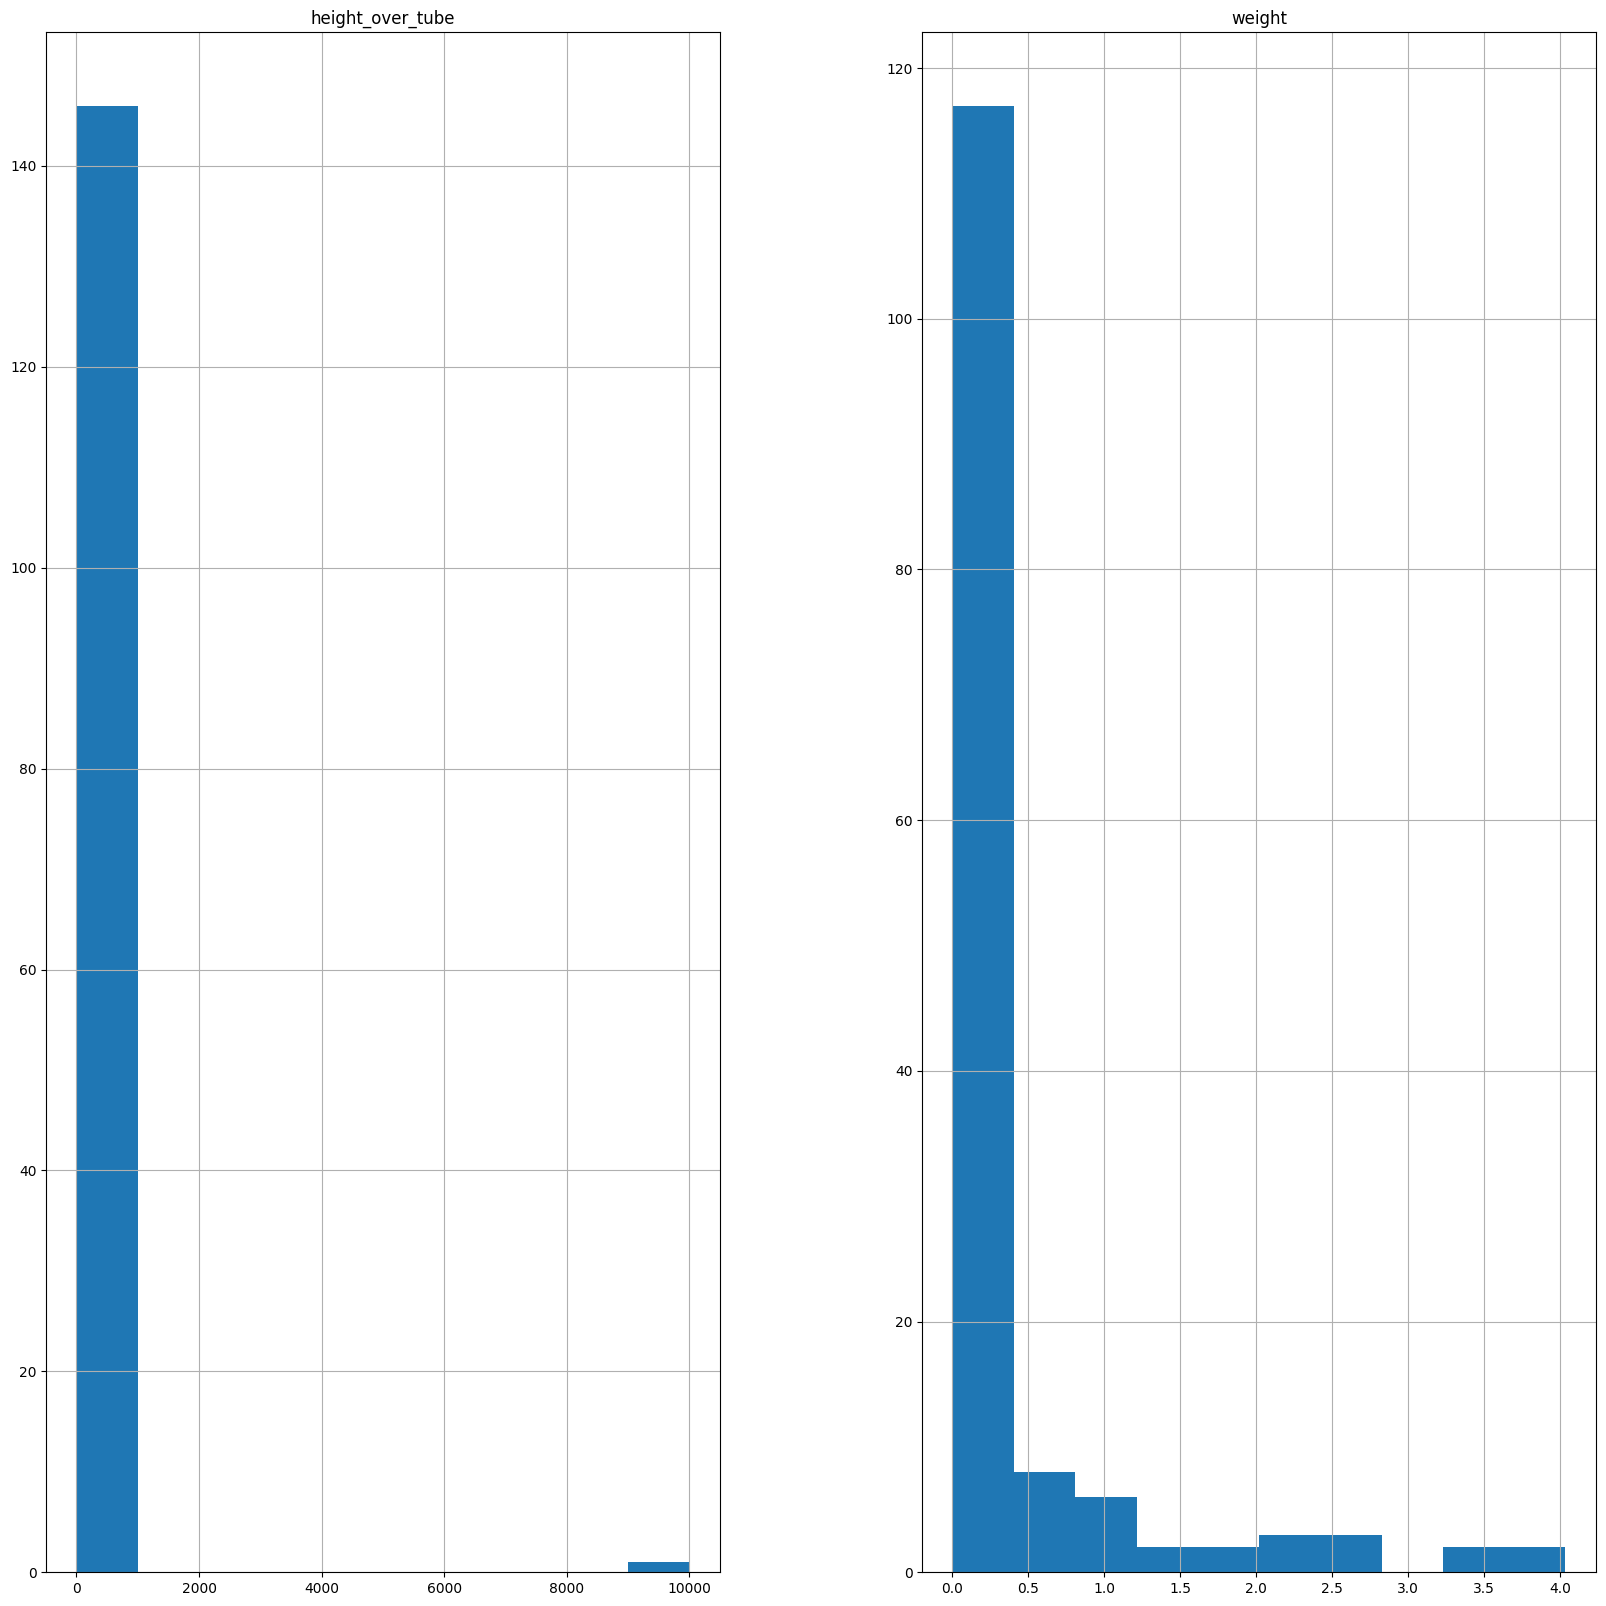

In [198]:
comp_boss.hist(figsize=(20,20))
plt.show()

<Axes: xlabel='height_over_tube'>

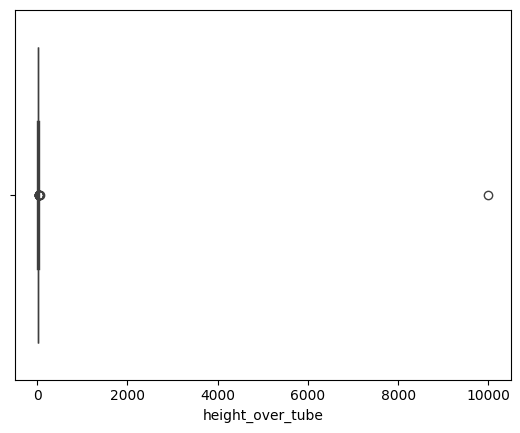

In [199]:
# Checking for  outliers in comp_boss
sns.boxplot(x=comp_boss['height_over_tube'])

<Axes: xlabel='weight'>

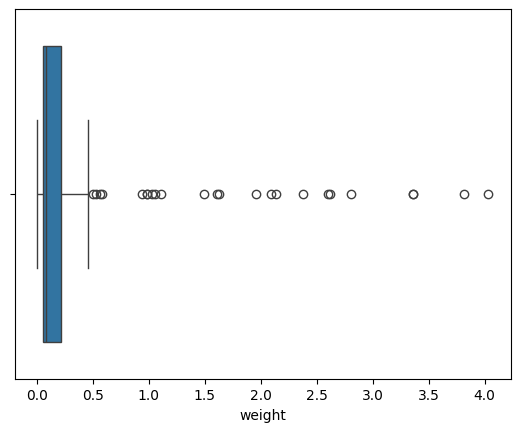

In [200]:
# Checking for  outliers in comp_boss
sns.boxplot(x=comp_boss['weight'])

In [201]:
def outliers_detection(dataframe):
  # outlier detection through IQR proximity rule as the distribution is skewed
  for i in dataframe.columns:
    if dataframe[i].dtypes != object:
      Q1 = dataframe[i].quantile(0.25)
      Q3 = dataframe[i].quantile(0.75)
      IQR = Q3 - Q1

      upperBound = Q3 + 1.5 * IQR

      if dataframe[i][dataframe[i] > upperBound].any() == True:
        print(f"-"*70)
        print(f" The UpperBound is  :  {upperBound}")
        print(i)
        print(f"-"*70)
        print(dataframe.loc[dataframe[i] == dataframe[i].max()])

In [202]:
outliers_detection(comp_boss)

----------------------------------------------------------------------
 The UpperBound is  :  36.6375
height_over_tube
----------------------------------------------------------------------
   component_id  height_over_tube  weight
31       C-0307            9999.0    1.05
----------------------------------------------------------------------
 The UpperBound is  :  0.4674999999999999
weight
----------------------------------------------------------------------
   component_id  height_over_tube  weight
21       C-0243              36.0   4.034


In [203]:
# outlier detection through IQR proximity rule as the distribution is skewed

# for i in comp_boss.columns:
#   if comp_boss[i].dtypes != object:
#     Q1 = comp_boss[i].quantile(0.25)
#     Q3 = comp_boss[i].quantile(0.75)
#     IQR = Q3 - Q1

#     upperBound = Q3 + 1.5 * IQR

#     print(f"-"*70)
#     print(f" The UpperBound is  :  {upperBound}")
#     print(f"-"*70)

#     if comp_boss[i][comp_boss[i] > upperBound].any() == True:
#       print(i)
#       print(comp_boss.loc[comp_boss[i] == comp_boss[i].max()])

In [204]:
comp_boss.drop(comp_boss.index[31], inplace=True)

In [205]:
comp_boss.head(10)

,component_id,height_over_tube,weight
0,C-0008,17.00,0.032
1,C-0009,13.00,0.033
2,C-0020,28.40,0.070
3,C-0054,27.10,0.180
4,C-0071,20.00,0.080
5,C-0082,15.65,0.043
6,C-0083,36.50,2.093
7,C-0084,36.50,2.601
8,C-0111,19.00,0.100
9,C-0117,22.00,0.081


In [206]:
# comp_elbow
comp_elbow.shape

(178, 16)

In [207]:
comp_elbow.head()

,component_id,component_type_id,bolt_pattern_long,bolt_pattern_wide,extension_length,overall_length,thickness,drop_length,elbow_angle,mj_class_code,mj_plug_class_code,plug_diameter,groove,unique_feature,orientation,weight
0,C-0013,CP-008,152.4,92.08,105.0,185.0,113.0,75.0,90.0,NaN,NaN,NaN,Yes,No,Yes,8.890
1,C-0016,CP-009,57.2,27.80,42.0,69.0,44.0,24.0,90.0,NaN,NaN,NaN,No,No,Yes,1.172
2,C-0017,CP-009,57.2,27.80,42.0,69.0,47.0,26.0,90.0,NaN,NaN,NaN,Yes,No,Yes,1.245
3,C-0018,CP-009,66.6,31.80,50.0,80.0,57.0,31.5,90.0,NaN,NaN,NaN,Yes,No,Yes,1.863
4,C-0021,CP-010,75.0,NaN,31.5,70.0,25.0,12.5,90.0,NaN,NaN,NaN,No,Yes,Yes,0.903


In [208]:
comp_elbow.isnull().sum().sum()

568

In [209]:
comp_elbow.isnull().sum()

component_id            0
component_type_id       0
bolt_pattern_long       7
bolt_pattern_wide      40
extension_length        8
overall_length          3
thickness               7
drop_length             7
elbow_angle            48
mj_class_code         137
mj_plug_class_code    138
plug_diameter         171
groove                  0
unique_feature          0
orientation             0
weight                  2
dtype: int64

In [210]:
comp_elbow.columns

Index(['component_id', 'component_type_id', 'bolt_pattern_long',
       'bolt_pattern_wide', 'extension_length', 'overall_length', 'thickness',
       'drop_length', 'elbow_angle', 'mj_class_code', 'mj_plug_class_code',
       'plug_diameter', 'groove', 'unique_feature', 'orientation', 'weight'],
      dtype='object')

In [211]:
# Keeping the necessary columns only
comp_elbow.drop(['component_type_id', 'mj_class_code', 'mj_plug_class_code',
                 'plug_diameter', 'groove', 'unique_feature', 'orientation'],
                axis =1, inplace = True)

comp_elbow.head()

,component_id,bolt_pattern_long,bolt_pattern_wide,extension_length,overall_length,thickness,drop_length,elbow_angle,weight
0,C-0013,152.4,92.08,105.0,185.0,113.0,75.0,90.0,8.890
1,C-0016,57.2,27.80,42.0,69.0,44.0,24.0,90.0,1.172
2,C-0017,57.2,27.80,42.0,69.0,47.0,26.0,90.0,1.245
3,C-0018,66.6,31.80,50.0,80.0,57.0,31.5,90.0,1.863
4,C-0021,75.0,NaN,31.5,70.0,25.0,12.5,90.0,0.903


In [212]:
comp_elbow.columns

Index(['component_id', 'bolt_pattern_long', 'bolt_pattern_wide',
       'extension_length', 'overall_length', 'thickness', 'drop_length',
       'elbow_angle', 'weight'],
      dtype='object')

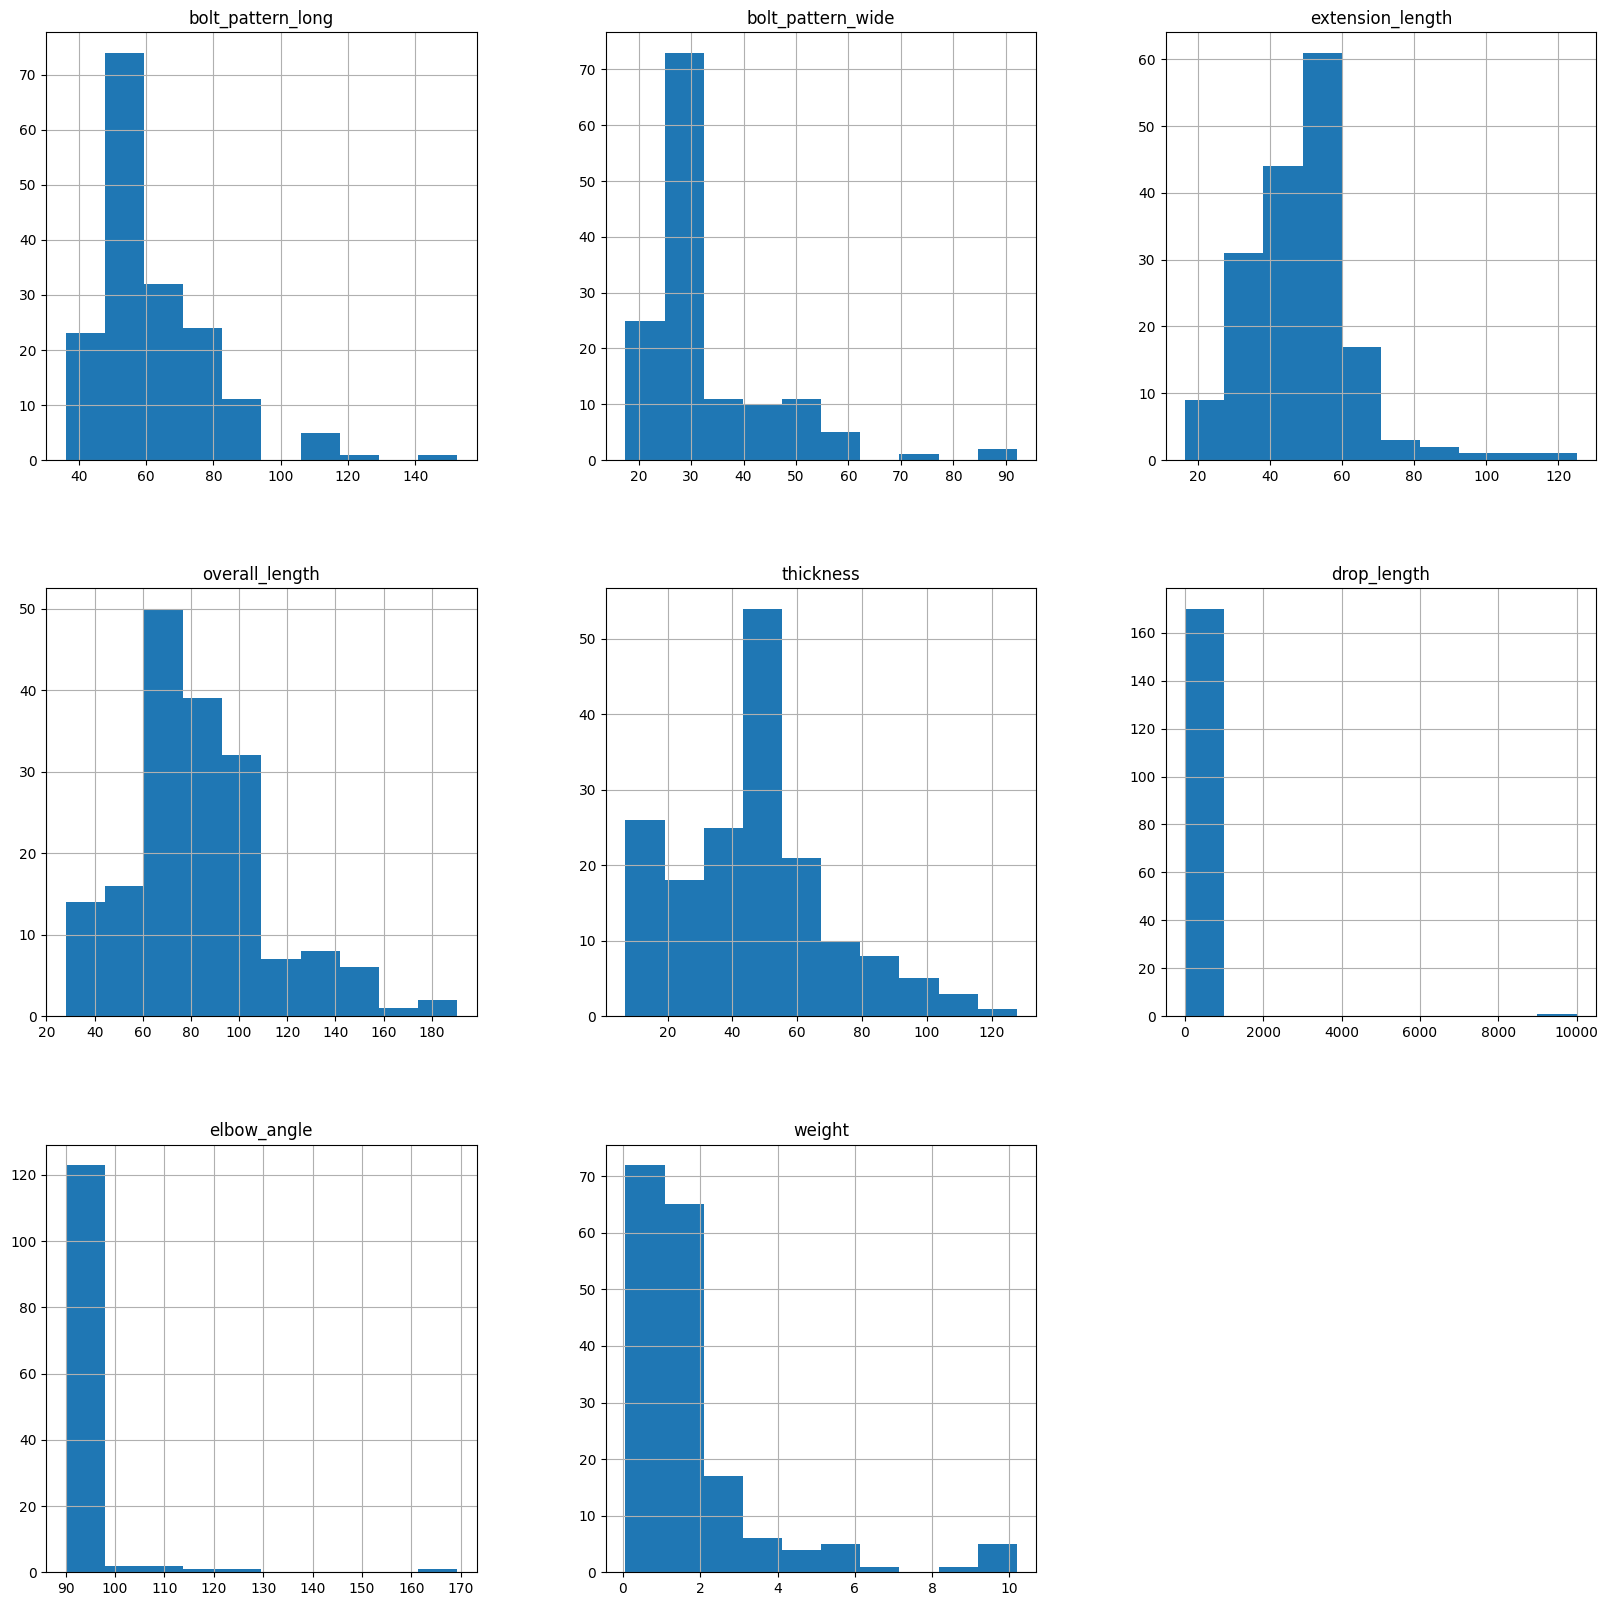

In [213]:
comp_elbow.hist(figsize=(20,20))

plt.show()

In [214]:
def plot_outliers(dataframe):

  cols = dataframe.columns

  for col in cols:
    if col == 'component_id':
      continue

    plt.figure()
    sns.boxplot(x=dataframe[col])
    plt.title(f"Outliers Boxplot of {col}")
    plt.show()

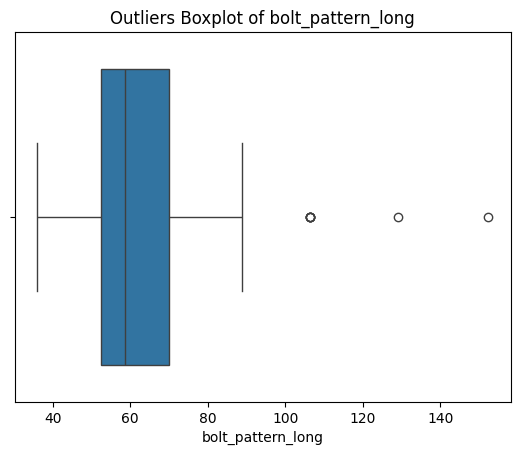

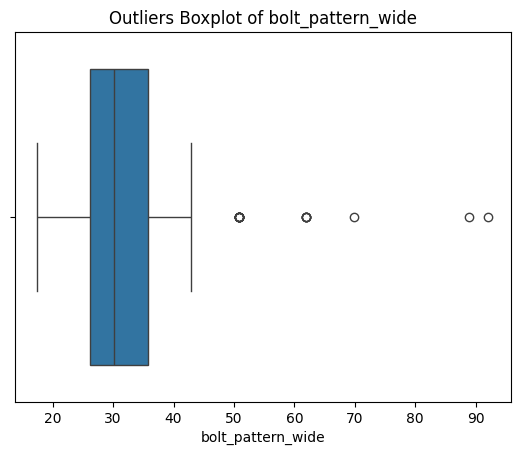

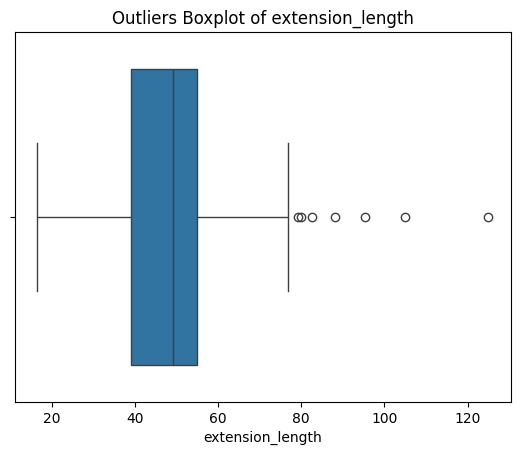

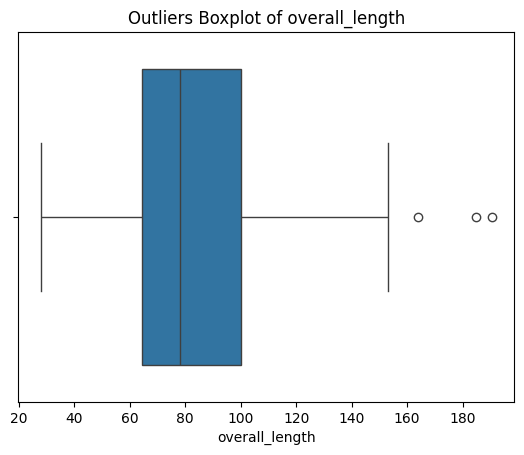

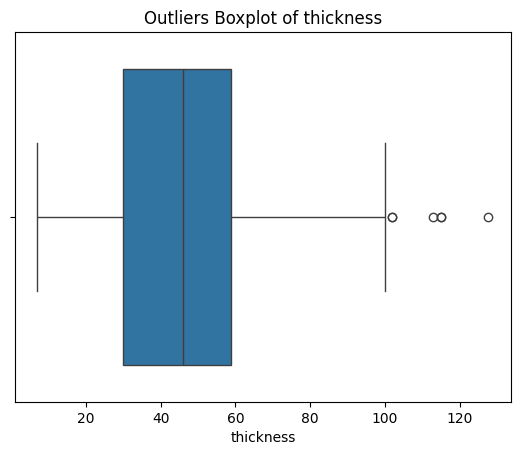

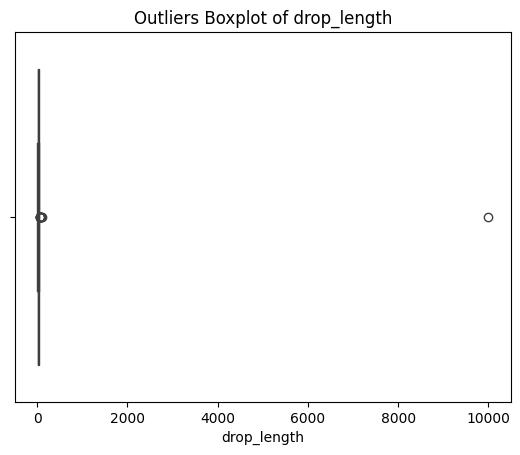

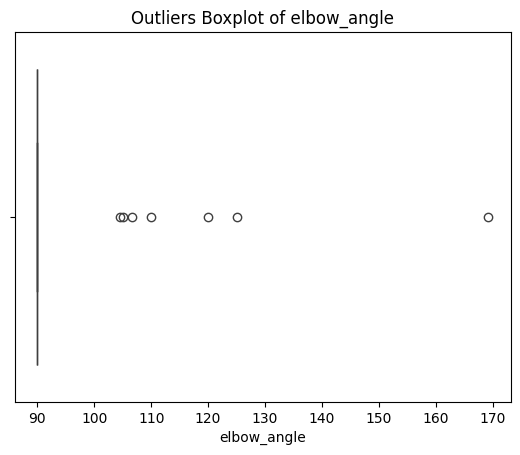

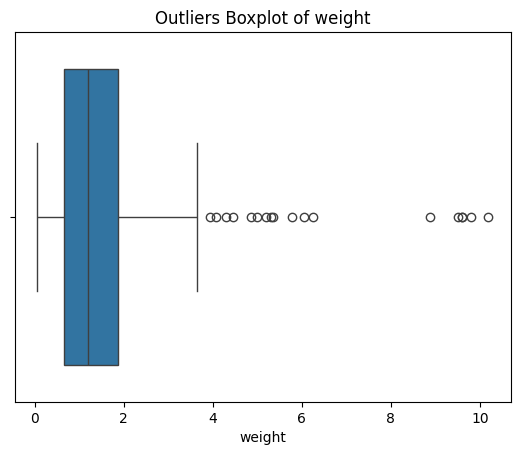

In [215]:
plot_outliers(comp_elbow)

In [216]:
outliers_detection(comp_elbow)

----------------------------------------------------------------------
 The UpperBound is  :  96.19500000000002
bolt_pattern_long
----------------------------------------------------------------------
  component_id  bolt_pattern_long  bolt_pattern_wide  extension_length  \
0       C-0013              152.4              92.08             105.0   

   overall_length  thickness  drop_length  elbow_angle  weight  
0           185.0      113.0         75.0         90.0    8.89  
----------------------------------------------------------------------
 The UpperBound is  :  49.965
bolt_pattern_wide
----------------------------------------------------------------------
  component_id  bolt_pattern_long  bolt_pattern_wide  extension_length  \
0       C-0013              152.4              92.08             105.0   

   overall_length  thickness  drop_length  elbow_angle  weight  
0           185.0      113.0         75.0         90.0    8.89  
---------------------------------------------------

In [217]:
print(comp_elbow.loc[[0, 26, 52, 62]])

   component_id  bolt_pattern_long  bolt_pattern_wide  extension_length  \
0        C-0013             152.40              92.08             105.0   
26       C-0169             106.38              61.93             125.0   
52       C-0537              78.20                NaN              32.0   
62       C-0646             106.38              61.93              55.5   

    overall_length  thickness  drop_length  elbow_angle  weight  
0           185.00      113.0         75.0        90.00   8.890  
26          190.55      127.7        100.0        90.00   9.805  
52           64.00       36.0       9999.0       169.25   0.420  
62          111.00      115.0         57.5        90.00  10.190  


In [218]:
comp_elbow.drop(comp_elbow.index[52], inplace=True)

In [219]:
comp_elbow.shape

(177, 9)

In [220]:
# comp_float
comp_float.shape

(16, 7)

In [221]:
comp_float

,component_id,component_type_id,bolt_pattern_long,bolt_pattern_wide,thickness,orientation,weight
0,C-0027,CP-021,148.00,96.00,18.00,Yes,2.230
1,C-0454,CP-022,58.72,30.18,28.00,No,0.590
2,C-0455,CP-022,58.72,30.18,28.00,No,0.525
3,C-0494,CP-022,52.40,26.20,15.85,No,0.230
4,C-0496,CP-022,58.80,30.20,14.20,No,0.284
5,C-0508,CP-021,77.76,42.88,25.40,Yes,1.144
6,C-0572,CP-022,69.85,35.71,15.70,No,0.447
7,C-0797,CP-021,120.65,69.85,20.00,Yes,1.983
8,C-0891,CP-021,47.62,22.22,28.00,Yes,0.465
9,C-1096,CP-022,76.40,69.90,25.00,No,2.565


In [222]:
comp_float.drop(['component_type_id', 'orientation'], axis=1, inplace=True)

comp_float

,component_id,bolt_pattern_long,bolt_pattern_wide,thickness,weight
0,C-0027,148.00,96.00,18.00,2.230
1,C-0454,58.72,30.18,28.00,0.590
2,C-0455,58.72,30.18,28.00,0.525
3,C-0494,52.40,26.20,15.85,0.230
4,C-0496,58.80,30.20,14.20,0.284
5,C-0508,77.76,42.88,25.40,1.144
6,C-0572,69.85,35.71,15.70,0.447
7,C-0797,120.65,69.85,20.00,1.983
8,C-0891,47.62,22.22,28.00,0.465
9,C-1096,76.40,69.90,25.00,2.565


In [223]:
comp_float.shape

(16, 5)

In [224]:
# comp_hfl
comp_hfl.shape

(6, 9)

In [225]:
comp_hfl

,component_id,component_type_id,hose_diameter,corresponding_shell,coupling_class,material,plating,orientation,weight
0,C-0872,CP-023,4.8,C-0855,SP-0098,SP-0016,Yes,No,0.010
1,C-0873,CP-023,4.8,C-0856,SP-0098,SP-0016,Yes,No,0.010
2,C-0874,CP-023,4.8,C-0857,SP-0098,SP-0038,Yes,No,0.001
3,C-1039,CP-023,15.9,C-1040,SP-0097,SP-0095,No,No,0.052
4,C-1041,CP-023,15.9,C-1042,SP-0099,SP-0095,No,No,0.065
5,C-1043,CP-023,25.4,C-1044,SP-0099,SP-0095,No,No,0.196


In [226]:
comp_hfl = comp_hfl[['component_id', 'hose_diameter', 'weight']]

In [227]:
comp_hfl

,component_id,hose_diameter,weight
0,C-0872,4.8,0.010
1,C-0873,4.8,0.010
2,C-0874,4.8,0.001
3,C-1039,15.9,0.052
4,C-1041,15.9,0.065
5,C-1043,25.4,0.196


In [228]:
# comp_nut
comp_nut.shape

(65, 11)

In [229]:
comp_nut.head()

,component_id,component_type_id,hex_nut_size,seat_angle,length,thread_size,thread_pitch,diameter,blind_hole,orientation,weight
0,C-1621,CP-025,20.64,NaN,17.0,.687,16.0,NaN,NaN,No,0.015
1,C-1624,CP-025,34.92,NaN,26.5,1.187,12.0,NaN,NaN,No,0.035
2,C-1623,CP-025,28.58,NaN,23.5,1.000,14.0,NaN,NaN,No,0.044
3,C-1622,CP-025,23.81,NaN,20.0,.812,16.0,NaN,NaN,No,0.036
4,C-1625,CP-025,41.28,NaN,27.5,1.437,12.0,NaN,NaN,No,0.129


In [230]:
comp_nut.isnull().sum().sum()

158

In [231]:
comp_nut.isnull().sum()

component_id          0
component_type_id     0
hex_nut_size         23
seat_angle           50
length                0
thread_size           0
thread_pitch          0
diameter             42
blind_hole           42
orientation           0
weight                1
dtype: int64

In [232]:
comp_nut.columns

Index(['component_id', 'component_type_id', 'hex_nut_size', 'seat_angle',
       'length', 'thread_size', 'thread_pitch', 'diameter', 'blind_hole',
       'orientation', 'weight'],
      dtype='object')

In [233]:
comp_nut.drop(['component_type_id', 'seat_angle', 'diameter',
               'blind_hole', 'orientation'], axis=1, inplace=True)

comp_nut.head()

,component_id,hex_nut_size,length,thread_size,thread_pitch,weight
0,C-1621,20.64,17.0,.687,16.0,0.015
1,C-1624,34.92,26.5,1.187,12.0,0.035
2,C-1623,28.58,23.5,1.000,14.0,0.044
3,C-1622,23.81,20.0,.812,16.0,0.036
4,C-1625,41.28,27.5,1.437,12.0,0.129


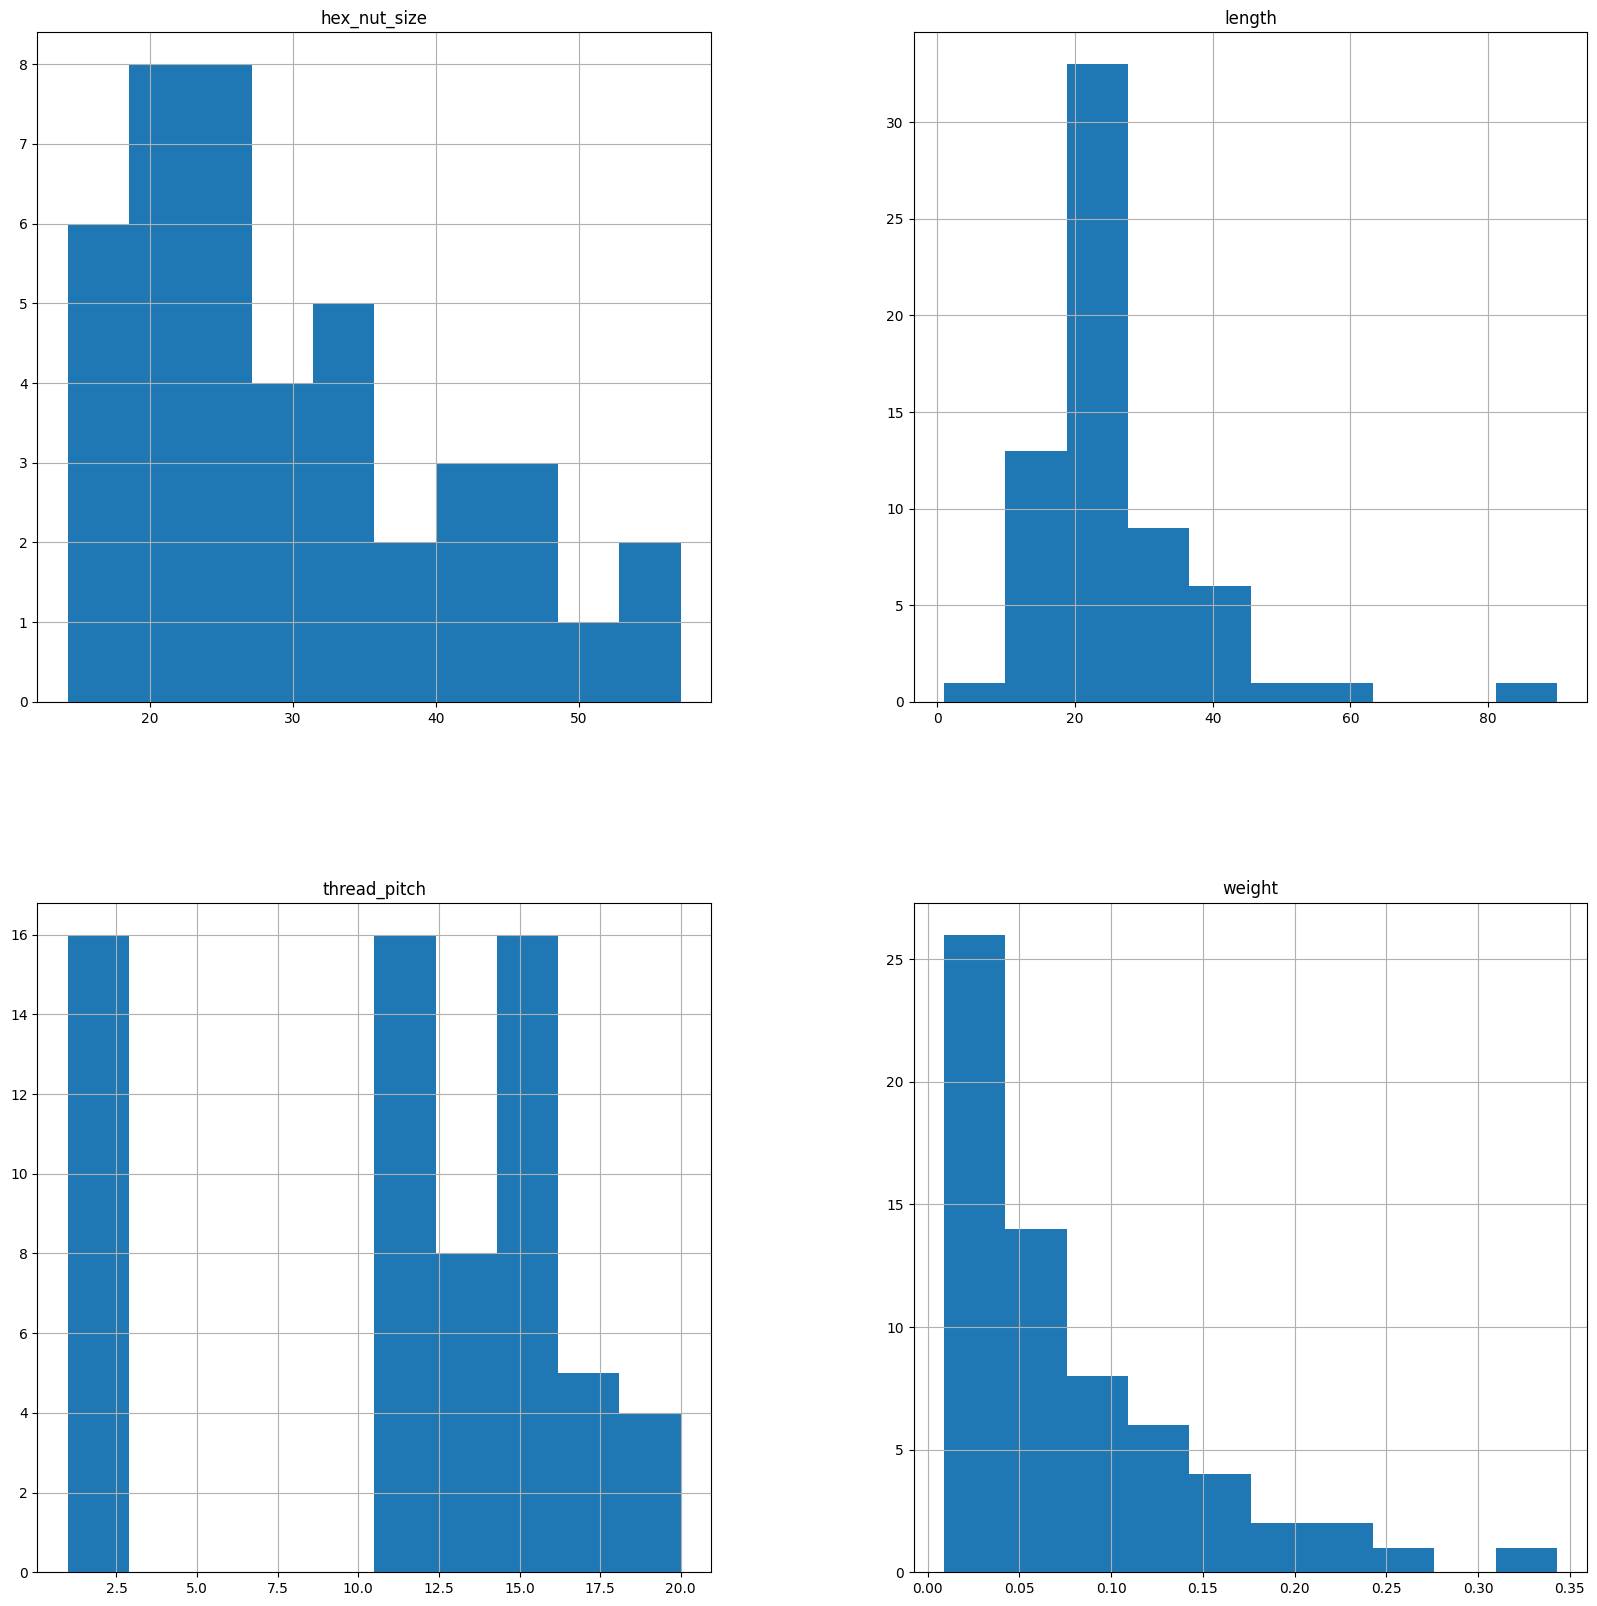

In [234]:
comp_nut.hist(figsize=(20, 20))
plt.show()

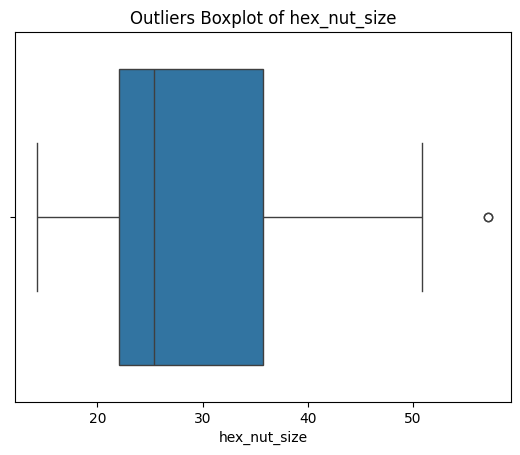

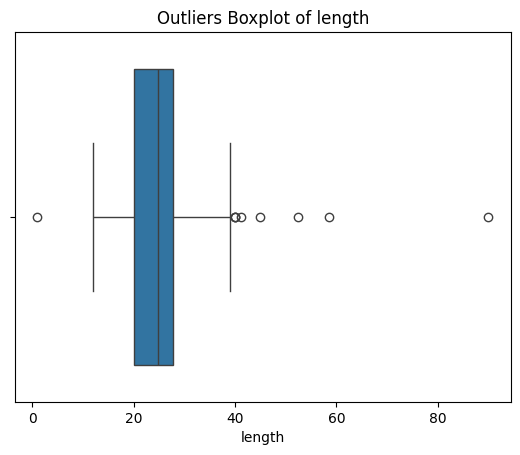

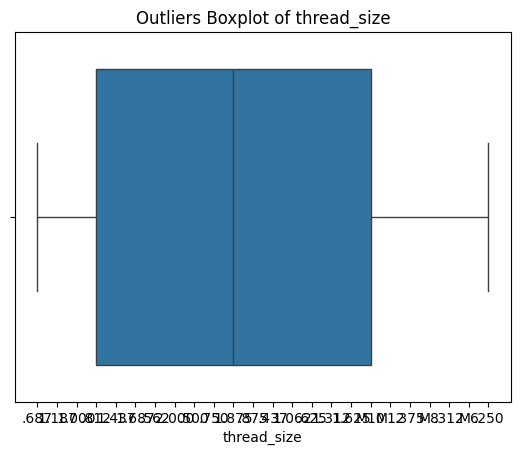

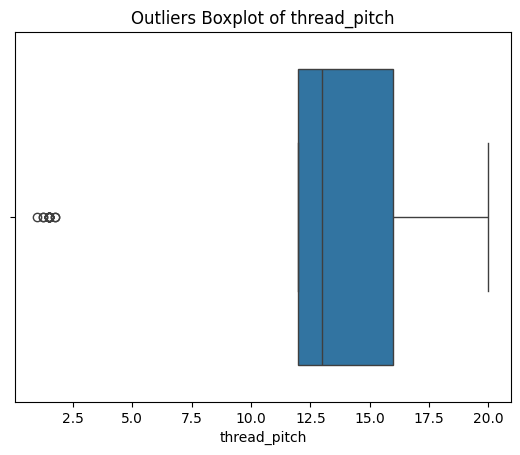

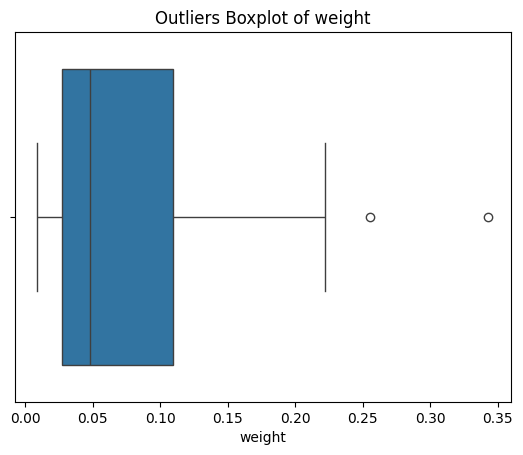

In [235]:
plot_outliers(comp_nut)

In [236]:
outliers_detection(comp_nut)

----------------------------------------------------------------------
 The UpperBound is  :  56.24250000000001
hex_nut_size
----------------------------------------------------------------------
   component_id  hex_nut_size  length thread_size  thread_pitch  weight
7        C-1867         57.15    27.5       2.000          12.0   0.222
27       C-1442         57.15    36.1       1.875          12.0   0.343
----------------------------------------------------------------------
 The UpperBound is  :  39.5
length
----------------------------------------------------------------------
   component_id  hex_nut_size  length thread_size  thread_pitch  weight
49       C-0720           NaN    90.0         M12          1.75   0.222
----------------------------------------------------------------------
 The UpperBound is  :  0.23262500000000003
weight
----------------------------------------------------------------------
   component_id  hex_nut_size  length thread_size  thread_pitch  weight
27 

In [237]:
print(comp_nut.loc[[7, 27, 49]])

   component_id  hex_nut_size  length thread_size  thread_pitch  weight
7        C-1867         57.15    27.5       2.000         12.00   0.222
27       C-1442         57.15    36.1       1.875         12.00   0.343
49       C-0720           NaN    90.0         M12          1.75   0.222


In [238]:
# comp_other
comp_other.shape

(1001, 3)

In [239]:
comp_other.head()

,component_id,part_name,weight
0,C-1385,NUT-FLARED,0.014
1,C-1386,SLEEVE-FLARED,0.005
2,C-1369,COLLAR,0.003
3,C-0422,WASHER-FUEL LIN,0.003
4,C-1817,FITTING-NUT,0.014


In [240]:
comp_other.isnull().sum().sum()

56

In [241]:
comp_other.isnull().sum()

component_id     0
part_name        0
weight          56
dtype: int64

In [242]:
comp_other.drop(['part_name'], axis=1, inplace=True)

In [243]:
comp_other.head()

,component_id,weight
0,C-1385,0.014
1,C-1386,0.005
2,C-1369,0.003
3,C-0422,0.003
4,C-1817,0.014


In [244]:
# comp_sleeve
comp_sleeve.shape

(50, 10)

In [245]:
comp_sleeve.head()

,component_id,component_type_id,connection_type_id,length,intended_nut_thread,intended_nut_pitch,unique_feature,plating,orientation,weight
0,C-0001,CP-024,B-001,17.3,1.062,12,No,No,No,0.013
1,C-0002,CP-024,B-001,11.2,0.500,20,No,No,No,0.005
2,C-0003,CP-024,B-001,19.3,1.187,12,No,No,No,0.014
3,C-0048,CP-024,B-002,9.5,0.562,18,No,No,No,0.006
4,C-0049,CP-024,B-002,9.5,0.812,16,No,No,No,0.012


In [246]:
comp_sleeve.isnull().sum().sum()

0

In [247]:
comp_sleeve.columns

Index(['component_id', 'component_type_id', 'connection_type_id', 'length',
       'intended_nut_thread', 'intended_nut_pitch', 'unique_feature',
       'plating', 'orientation', 'weight'],
      dtype='object')

In [248]:
comp_sleeve.drop(['component_type_id', 'connection_type_id', 'unique_feature',
                  'plating', 'orientation'], axis = 1, inplace=True)

comp_sleeve.head()

,component_id,length,intended_nut_thread,intended_nut_pitch,weight
0,C-0001,17.3,1.062,12,0.013
1,C-0002,11.2,0.500,20,0.005
2,C-0003,19.3,1.187,12,0.014
3,C-0048,9.5,0.562,18,0.006
4,C-0049,9.5,0.812,16,0.012


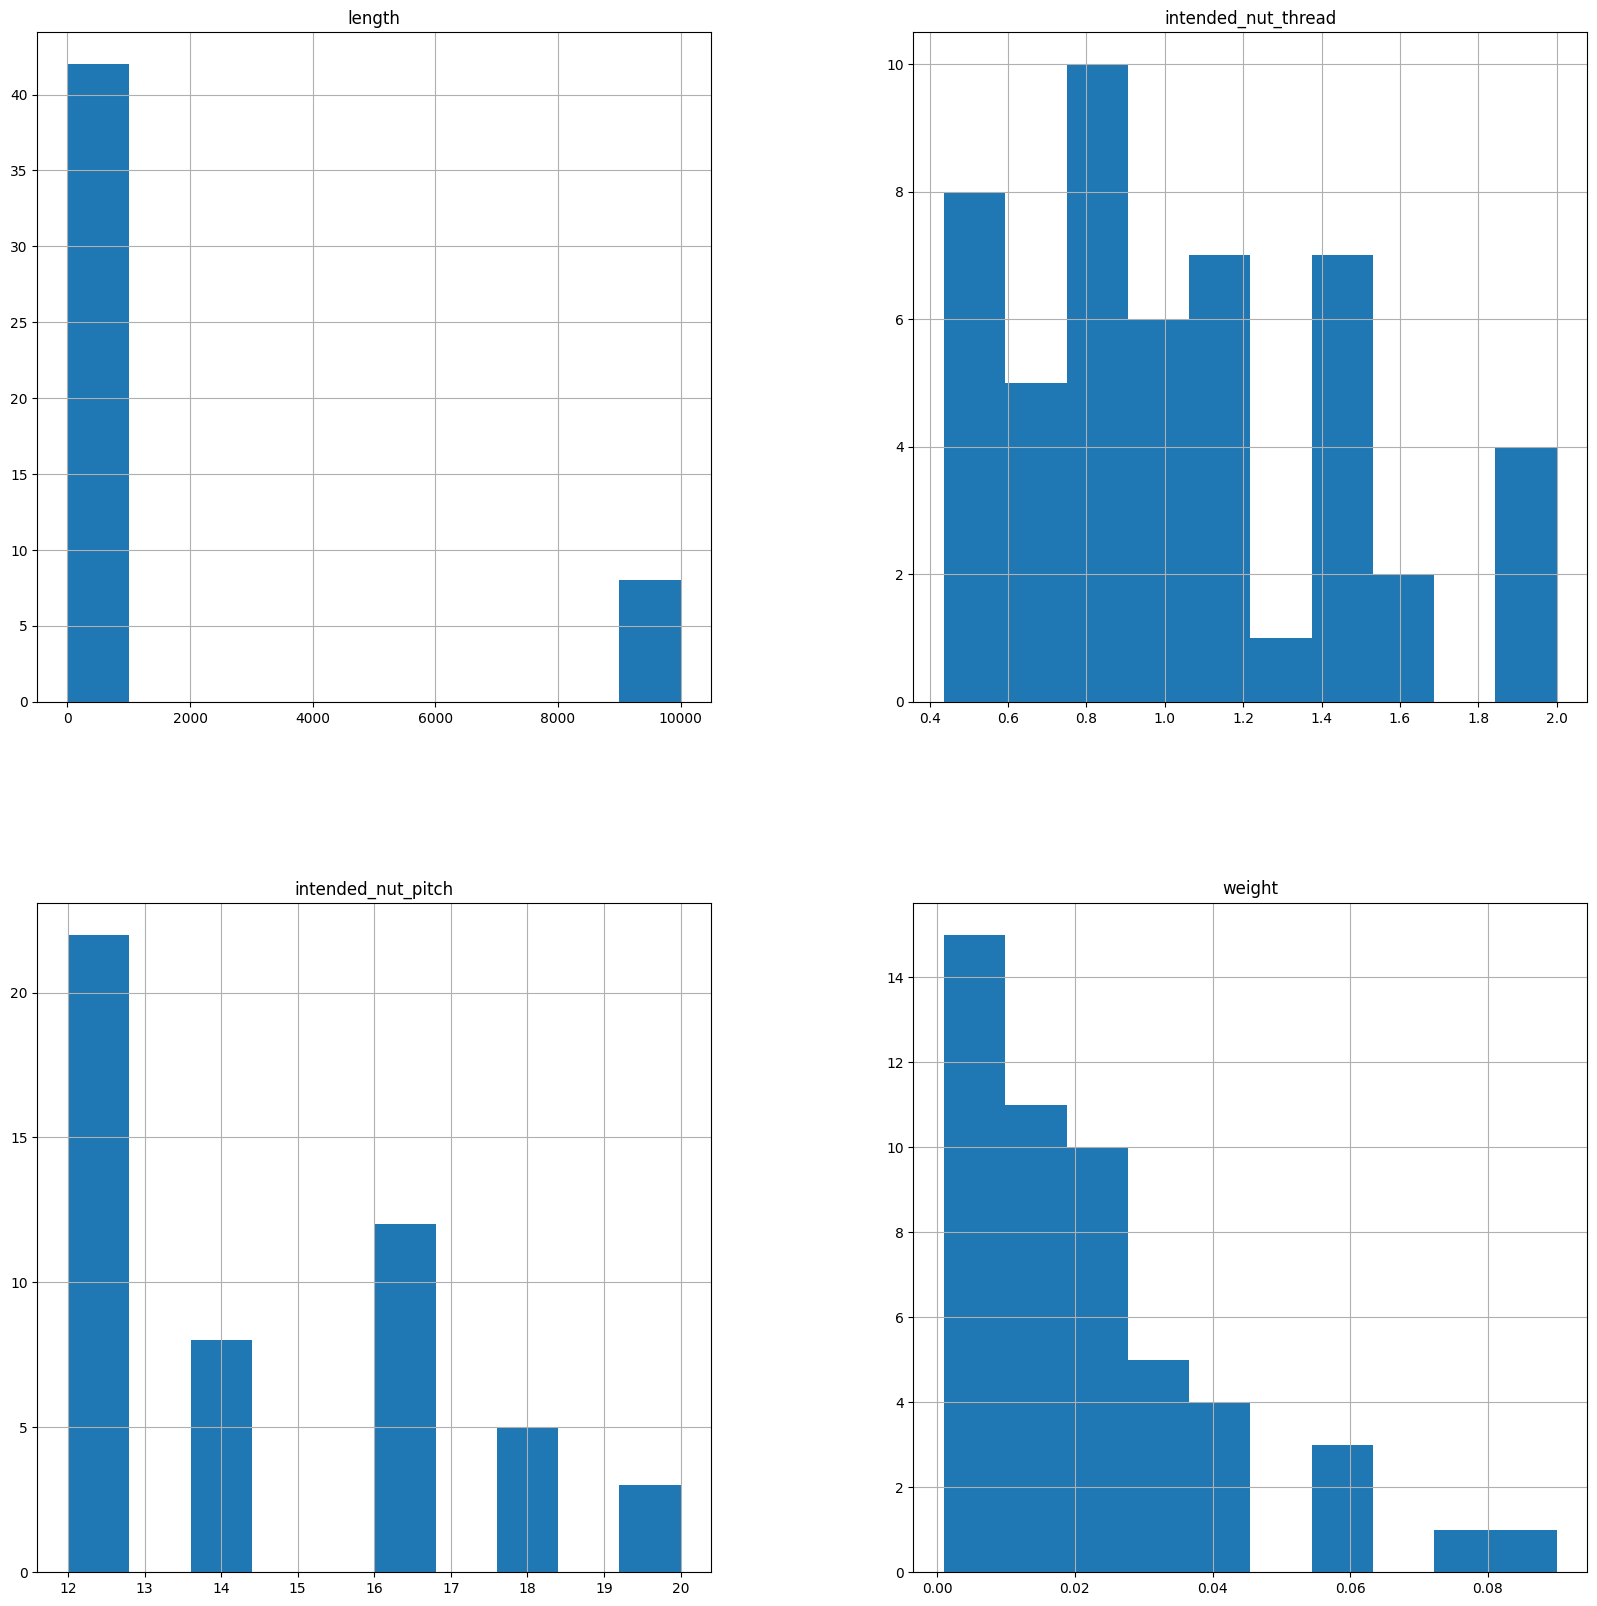

In [249]:
comp_sleeve.hist(figsize=(20, 20))

plt.show()

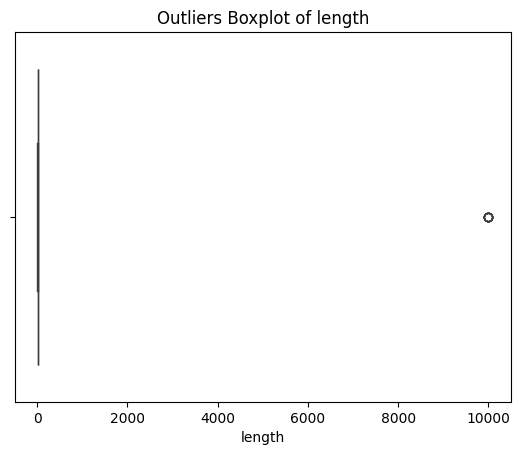

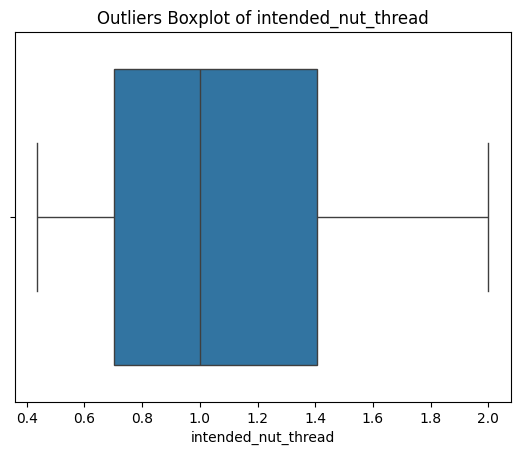

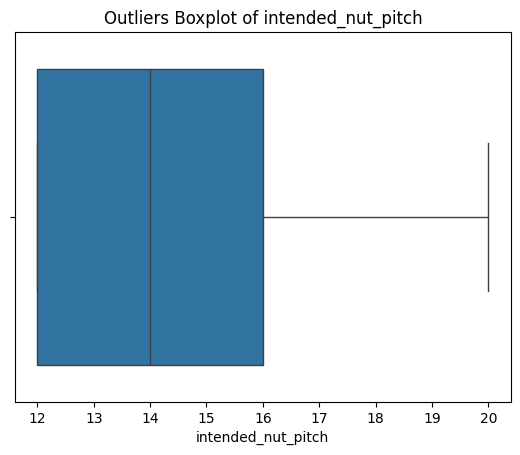

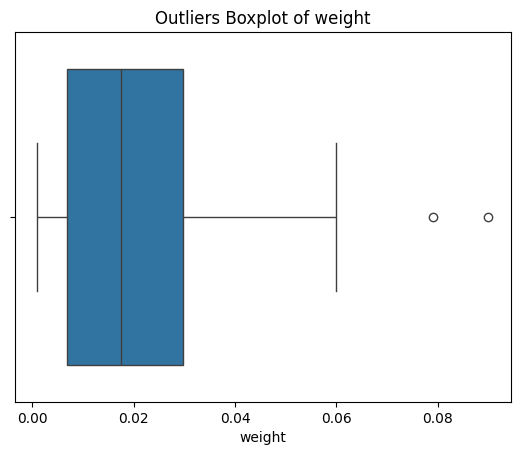

In [250]:
plot_outliers(comp_sleeve)

In [251]:
outliers_detection(comp_sleeve)

----------------------------------------------------------------------
 The UpperBound is  :  29.0
length
----------------------------------------------------------------------
   component_id  length  intended_nut_thread  intended_nut_pitch  weight
28       C-1627  9999.0                0.562                  18   0.005
29       C-1628  9999.0                0.687                  16   0.006
30       C-1629  9999.0                0.812                  16   0.012
31       C-1630  9999.0                1.000                  14   0.018
32       C-1631  9999.0                1.187                  12   0.026
33       C-1632  9999.0                1.437                  12   0.033
34       C-1633  9999.0                1.687                  12   0.040
48       C-1866  9999.0                2.000                  12   0.035
----------------------------------------------------------------------
 The UpperBound is  :  0.06425
weight
---------------------------------------------------------

In [252]:
comp_sleeve.drop(comp_sleeve.index[[28, 29, 30, 31, 32, 33, 34, 48]], inplace=True)

In [253]:
comp_sleeve.shape

(42, 5)

In [254]:
# comp_straight
comp_straight.shape

(361, 12)

In [255]:
comp_straight.head()

,component_id,component_type_id,bolt_pattern_long,bolt_pattern_wide,head_diameter,overall_length,thickness,mj_class_code,groove,unique_feature,orientation,weight
0,C-0012,CP-001,66.68,31.75,NaN,40.0,20.0,NaN,No,No,Yes,0.788
1,C-0014,CP-001,47.60,22.20,NaN,38.0,15.0,NaN,Yes,No,Yes,0.339
2,C-0015,CP-001,66.70,31.80,NaN,40.0,20.0,NaN,Yes,No,Yes,0.788
3,C-0019,CP-002,77.80,42.90,NaN,NaN,36.5,MJ-003,No,No,Yes,1.533
4,C-0029,CP-001,47.63,22.23,NaN,NaN,16.0,NaN,Yes,No,Yes,0.286


In [256]:
comp_straight.isnull().sum().sum()

1086

In [257]:
comp_straight.isnull().sum()

component_id           0
component_type_id      0
bolt_pattern_long     70
bolt_pattern_wide    157
head_diameter        291
overall_length       320
thickness              0
mj_class_code        241
groove                 0
unique_feature         0
orientation            0
weight                 7
dtype: int64

In [258]:
comp_straight.columns

Index(['component_id', 'component_type_id', 'bolt_pattern_long',
       'bolt_pattern_wide', 'head_diameter', 'overall_length', 'thickness',
       'mj_class_code', 'groove', 'unique_feature', 'orientation', 'weight'],
      dtype='object')

In [259]:
comp_straight.drop(['component_type_id', 'overall_length','mj_class_code',
                    'head_diameter', 'groove', 'unique_feature', 'orientation'],
                   axis=1, inplace=True)

comp_straight.head()

,component_id,bolt_pattern_long,bolt_pattern_wide,thickness,weight
0,C-0012,66.68,31.75,20.0,0.788
1,C-0014,47.60,22.20,15.0,0.339
2,C-0015,66.70,31.80,20.0,0.788
3,C-0019,77.80,42.90,36.5,1.533
4,C-0029,47.63,22.23,16.0,0.286


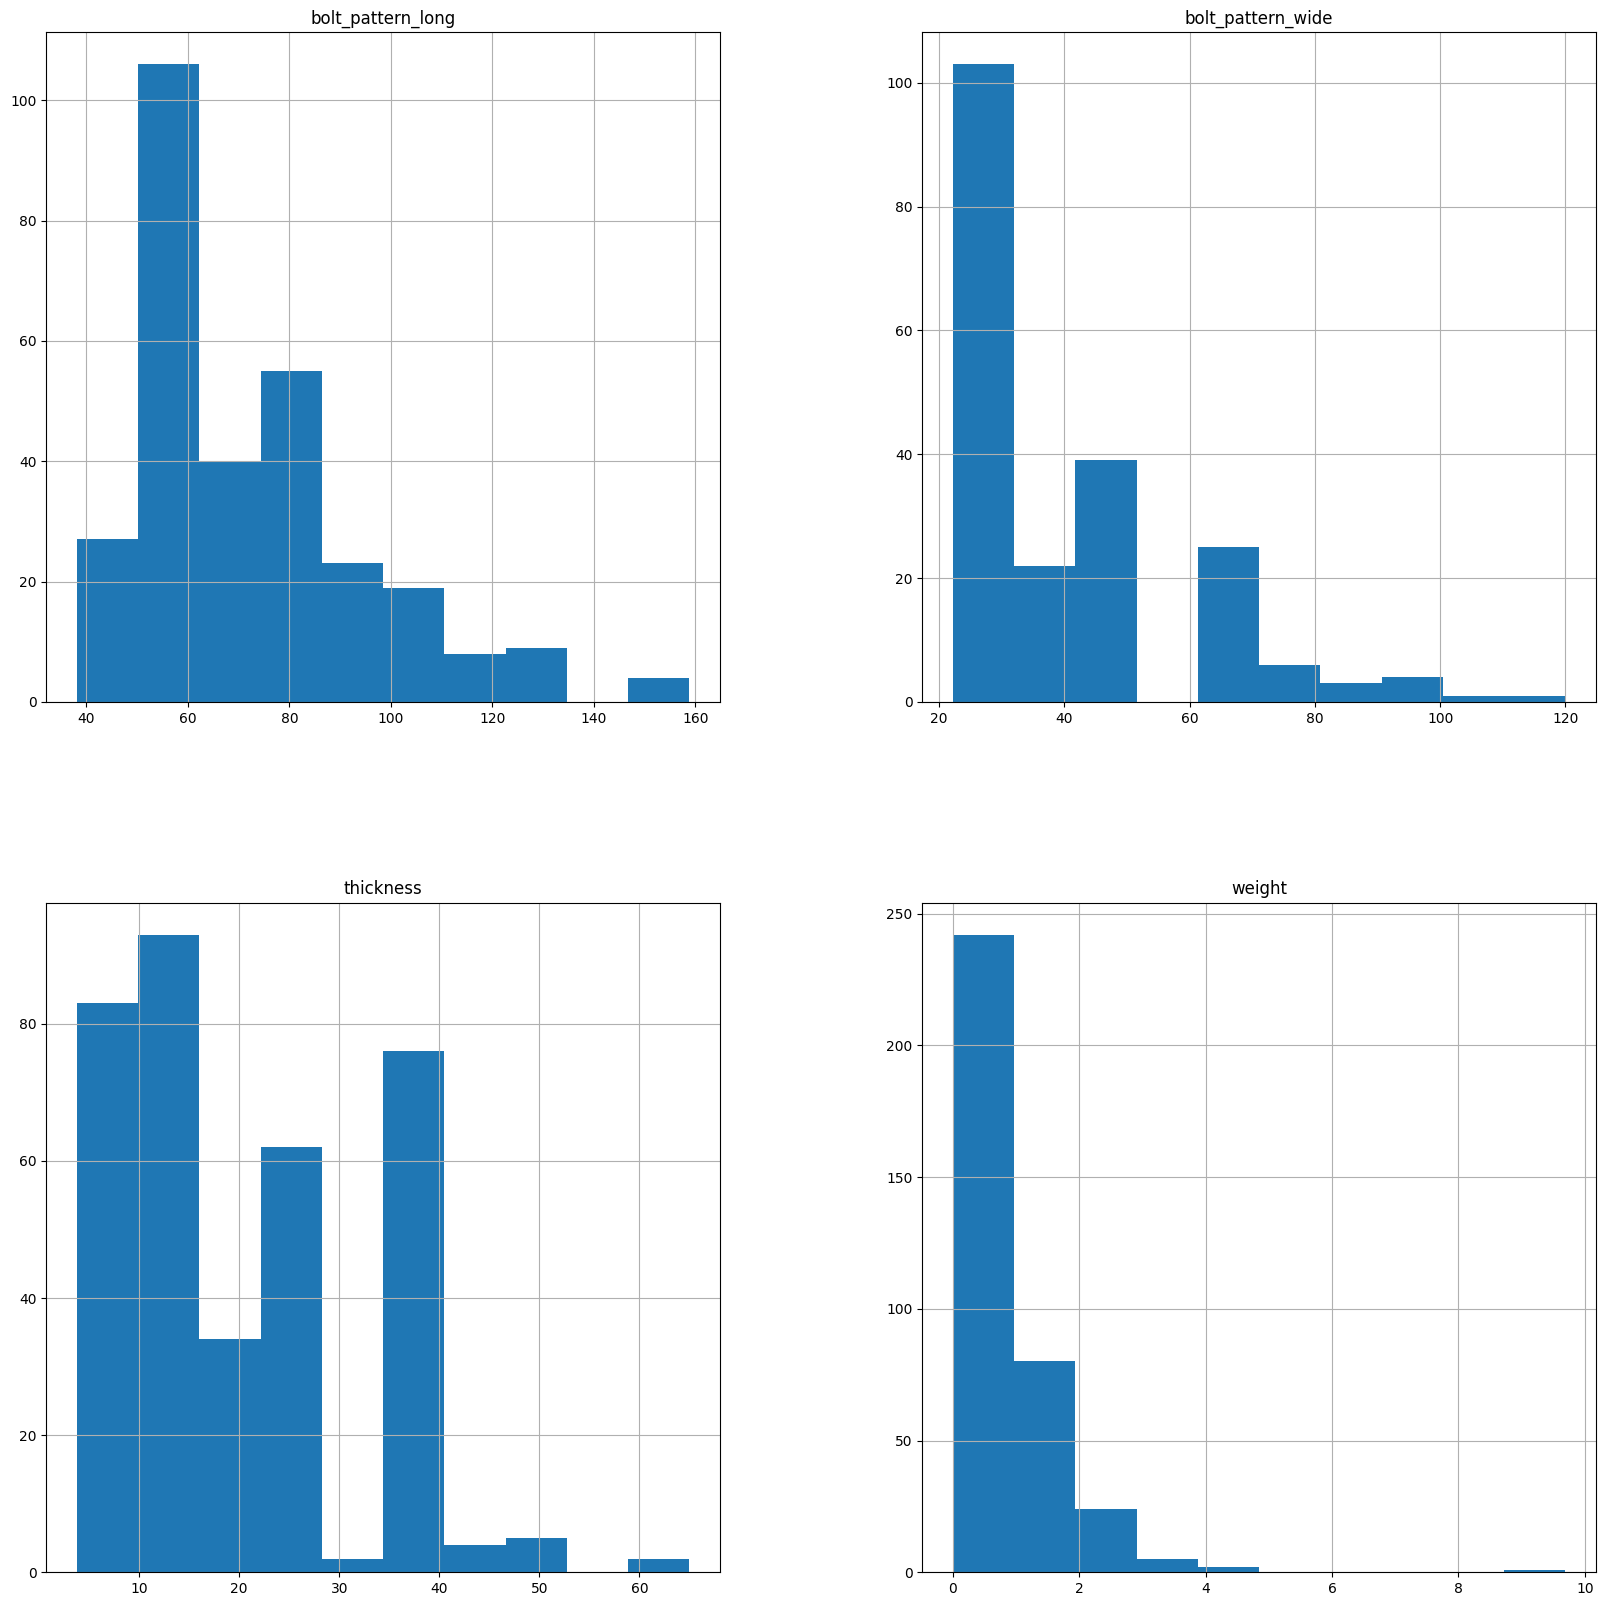

In [260]:
comp_straight.hist(figsize=(20, 20))

plt.show()

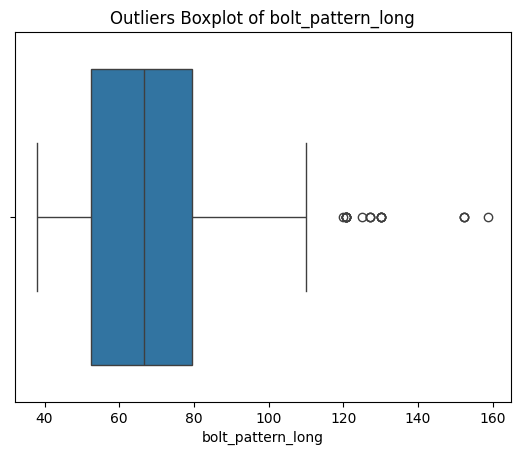

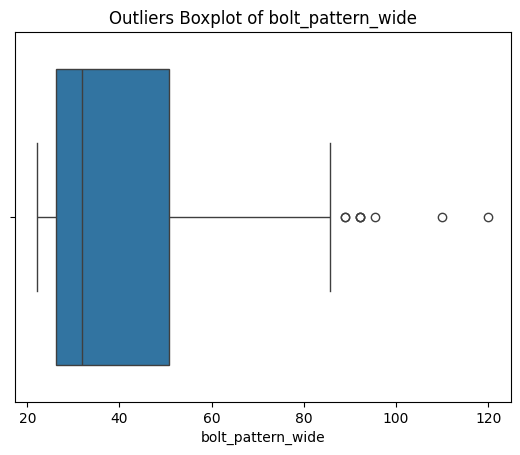

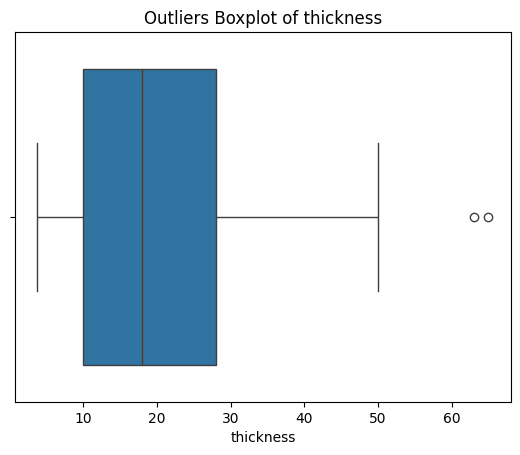

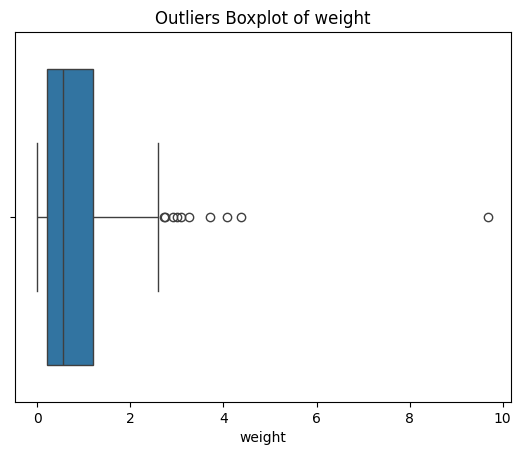

In [261]:
plot_outliers(comp_straight)

In [262]:
outliers_detection(comp_straight)

----------------------------------------------------------------------
 The UpperBound is  :  119.90000000000002
bolt_pattern_long
----------------------------------------------------------------------
    component_id  bolt_pattern_long  bolt_pattern_wide  thickness  weight
162       C-0966              158.8                NaN       38.0   1.535
----------------------------------------------------------------------
 The UpperBound is  :  87.69999999999999
bolt_pattern_wide
----------------------------------------------------------------------
    component_id  bolt_pattern_long  bolt_pattern_wide  thickness  weight
145       C-0840              120.0              120.0      19.05   2.447
----------------------------------------------------------------------
 The UpperBound is  :  55.0
thickness
----------------------------------------------------------------------
   component_id  bolt_pattern_long  bolt_pattern_wide  thickness  weight
35       C-0190              52.37              

In [263]:
# comp_tree
comp_tee.shape

(4, 14)

In [264]:
comp_tee

,component_id,component_type_id,bolt_pattern_long,bolt_pattern_wide,extension_length,overall_length,thickness,drop_length,mj_class_code,mj_plug_class_code,groove,unique_feature,orientation,weight
0,C-0271,OTHER,58.70,30.20,57.10,93.0,57,28.5,MJ-003,Threaded,No,No,Yes,1.526
1,C-1809,OTHER,58.72,30.18,57.09,108.0,57,28.5,MJ-003,MJ-005,No,No,Yes,2.184
2,C-1830,OTHER,52.40,26.20,43.50,78.5,51,25.5,MJ-003,Threaded,No,Yes,Yes,1.135
3,C-1865,OTHER,58.70,30.20,57.10,107.0,57,28.5,MJ-003,MJ-005,No,No,Yes,1.953


In [265]:
comp_tee.isnull().sum().sum()

0

In [266]:
comp_tee.columns

Index(['component_id', 'component_type_id', 'bolt_pattern_long',
       'bolt_pattern_wide', 'extension_length', 'overall_length', 'thickness',
       'drop_length', 'mj_class_code', 'mj_plug_class_code', 'groove',
       'unique_feature', 'orientation', 'weight'],
      dtype='object')

In [267]:
comp_tee.drop(['component_type_id', 'mj_class_code', 'mj_plug_class_code',
                'groove', 'unique_feature', 'orientation'],
               axis = 1, inplace = True)

comp_tee

,component_id,bolt_pattern_long,bolt_pattern_wide,extension_length,overall_length,thickness,drop_length,weight
0,C-0271,58.70,30.20,57.10,93.0,57,28.5,1.526
1,C-1809,58.72,30.18,57.09,108.0,57,28.5,2.184
2,C-1830,52.40,26.20,43.50,78.5,51,25.5,1.135
3,C-1865,58.70,30.20,57.10,107.0,57,28.5,1.953


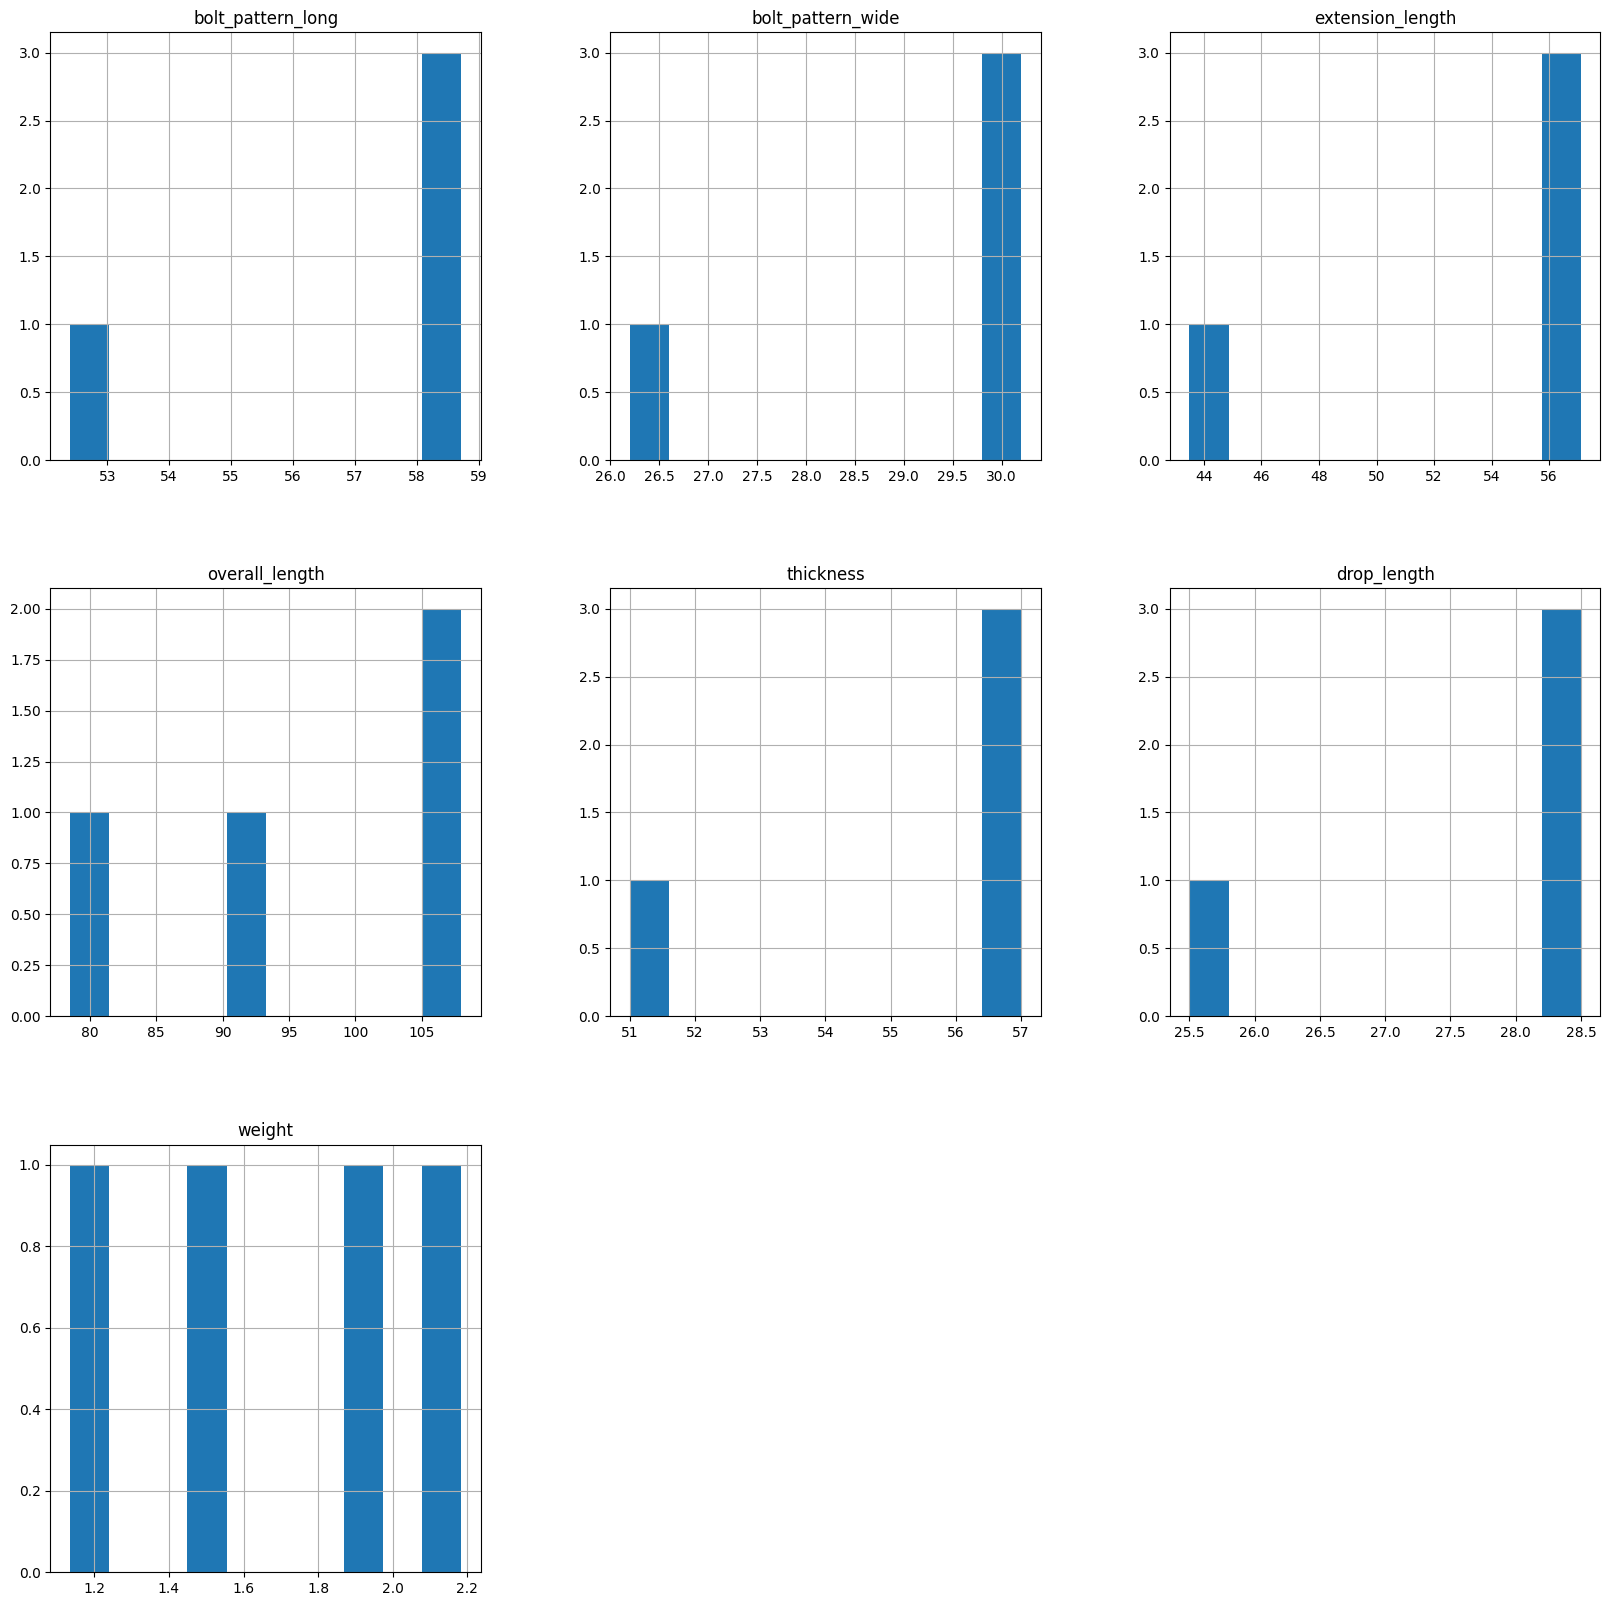

In [268]:
comp_tee.hist(figsize=(20, 20))
plt.show()

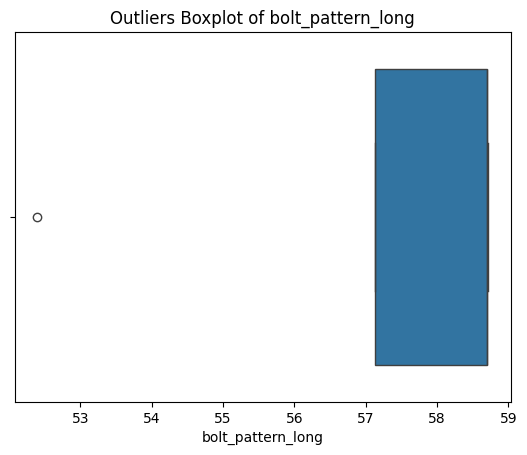

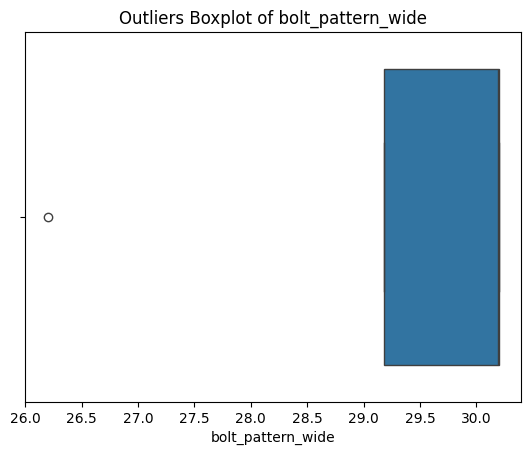

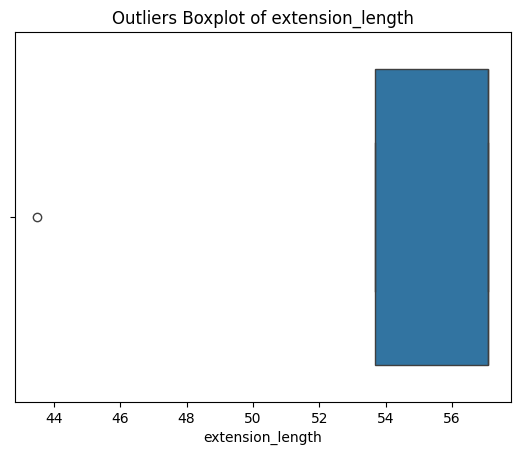

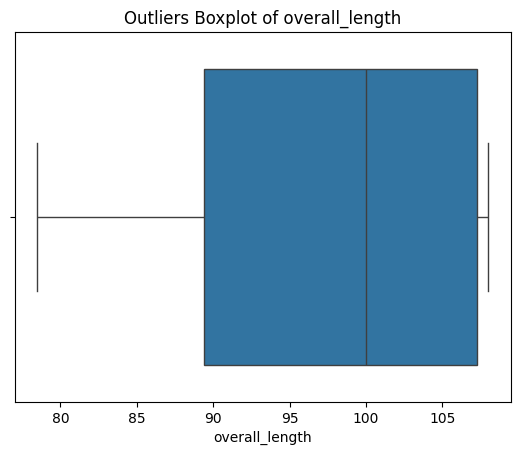

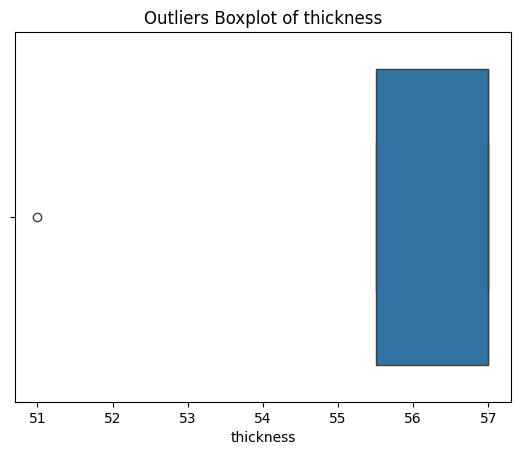

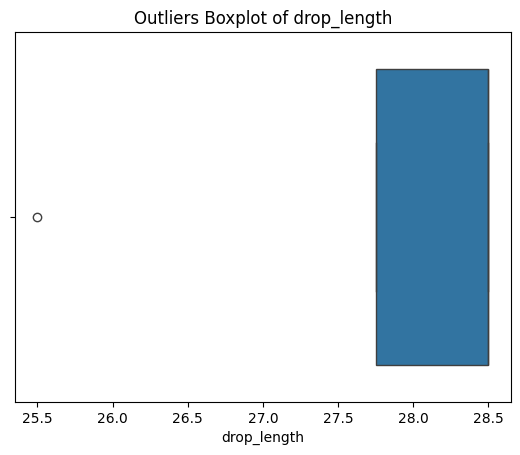

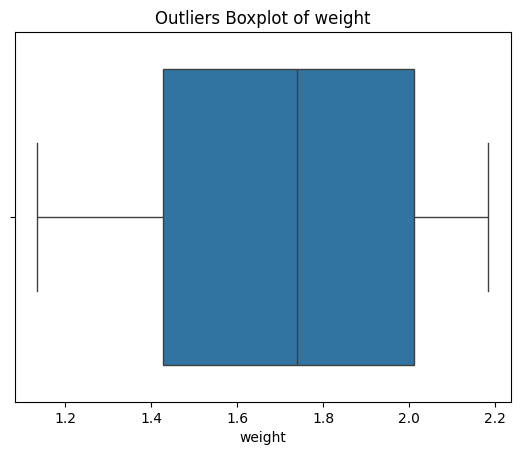

In [269]:
plot_outliers(comp_tee)

In [270]:
outliers_detection(comp_tee)

In [271]:
# comp_threaded
comp_threaded.shape

(194, 32)

In [272]:
comp_threaded.head()

,component_id,component_type_id,adaptor_angle,overall_length,hex_size,end_form_id_1,connection_type_id_1,length_1,thread_size_1,thread_pitch_1,...,nominal_size_3,end_form_id_4,connection_type_id_4,length_4,thread_size_4,thread_pitch_4,nominal_size_4,unique_feature,orientation,weight
0,C-0007,CP-014,NaN,24.4,12.70,A-001,B-001,NaN,0.437,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,0.028
1,C-0030,CP-015,90.0,NaN,NaN,A-003,NaN,47.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,0.914
2,C-0041,CP-014,NaN,28.0,32.00,A-004,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,0.120
3,C-0043,CP-014,NaN,38.0,27.00,A-003,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,0.090
4,C-0044,CP-014,NaN,30.5,41.28,A-004,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,0.182


In [273]:
comp_threaded.isnull().sum().sum()

3551

In [274]:
comp_threaded.isnull().sum()

component_id              0
component_type_id         0
adaptor_angle           140
overall_length           73
hex_size                 82
end_form_id_1             0
connection_type_id_1     59
length_1                121
thread_size_1            59
thread_pitch_1           59
nominal_size_1          134
end_form_id_2             0
connection_type_id_2    131
length_2                121
thread_size_2           131
thread_pitch_2          131
nominal_size_2           63
end_form_id_3           175
connection_type_id_3    184
length_3                175
thread_size_3           184
thread_pitch_3          184
nominal_size_3          185
end_form_id_4           193
connection_type_id_4    193
length_4                193
thread_size_4           193
thread_pitch_4          193
nominal_size_4          194
unique_feature            0
orientation               0
weight                    1
dtype: int64

In [275]:
comp_threaded.columns

Index(['component_id', 'component_type_id', 'adaptor_angle', 'overall_length',
       'hex_size', 'end_form_id_1', 'connection_type_id_1', 'length_1',
       'thread_size_1', 'thread_pitch_1', 'nominal_size_1', 'end_form_id_2',
       'connection_type_id_2', 'length_2', 'thread_size_2', 'thread_pitch_2',
       'nominal_size_2', 'end_form_id_3', 'connection_type_id_3', 'length_3',
       'thread_size_3', 'thread_pitch_3', 'nominal_size_3', 'end_form_id_4',
       'connection_type_id_4', 'length_4', 'thread_size_4', 'thread_pitch_4',
       'nominal_size_4', 'unique_feature', 'orientation', 'weight'],
      dtype='object')

In [276]:
comp_threaded.drop(['component_type_id', 'adaptor_angle', 'end_form_id_1',
                    'connection_type_id_1', 'end_form_id_2','connection_type_id_2',
                    'end_form_id_3', 'connection_type_id_3', 'end_form_id_4',
                    'connection_type_id_4', 'nominal_size_4', 'unique_feature',
                    'orientation'], axis = 1, inplace = True)

comp_threaded.head()

,component_id,overall_length,hex_size,length_1,thread_size_1,thread_pitch_1,nominal_size_1,length_2,thread_size_2,thread_pitch_2,nominal_size_2,length_3,thread_size_3,thread_pitch_3,nominal_size_3,length_4,thread_size_4,thread_pitch_4,weight
0,C-0007,24.4,12.70,NaN,0.437,20.0,NaN,NaN,NaN,NaN,6.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028
1,C-0030,NaN,NaN,47.0,NaN,NaN,42,47.0,NaN,NaN,42.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.914
2,C-0041,28.0,32.00,NaN,NaN,NaN,21.7,NaN,0.812,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.120
3,C-0043,38.0,27.00,NaN,NaN,NaN,21.7,NaN,0.812,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.090
4,C-0044,30.5,41.28,NaN,NaN,NaN,34,NaN,1.437,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.182


In [277]:
# There are five columns with length. So I fill NA with 0, summarize length and drop excessive columns
comp_threaded['length_1'] = comp_threaded['length_1'].fillna(0)
comp_threaded['length_2'] = comp_threaded['length_2'].fillna(0)
comp_threaded['length_3'] = comp_threaded['length_3'].fillna(0)
comp_threaded['length_4'] = comp_threaded['length_4'].fillna(0)

comp_threaded['overall_length'] = comp_threaded['overall_length'].fillna(0)
comp_threaded['overall_length'] = comp_threaded['overall_length'] + comp_threaded['length_1'] + comp_threaded['length_2'] + comp_threaded['length_3'] + comp_threaded['length_4']

comp_threaded.drop(['length_1', 'length_2', 'length_3', 'length_4'], axis = 1, inplace = True)

comp_threaded.head()

,component_id,overall_length,hex_size,thread_size_1,thread_pitch_1,nominal_size_1,thread_size_2,thread_pitch_2,nominal_size_2,thread_size_3,thread_pitch_3,nominal_size_3,thread_size_4,thread_pitch_4,weight
0,C-0007,24.4,12.70,0.437,20.0,NaN,NaN,NaN,6.35,NaN,NaN,NaN,NaN,NaN,0.028
1,C-0030,94.0,NaN,NaN,NaN,42,NaN,NaN,42.00,NaN,NaN,NaN,NaN,NaN,0.914
2,C-0041,28.0,32.00,NaN,NaN,21.7,0.812,16.0,NaN,NaN,NaN,NaN,NaN,NaN,0.120
3,C-0043,38.0,27.00,NaN,NaN,21.7,0.812,16.0,NaN,NaN,NaN,NaN,NaN,NaN,0.090
4,C-0044,30.5,41.28,NaN,NaN,34,1.437,12.0,NaN,NaN,NaN,NaN,NaN,NaN,0.182


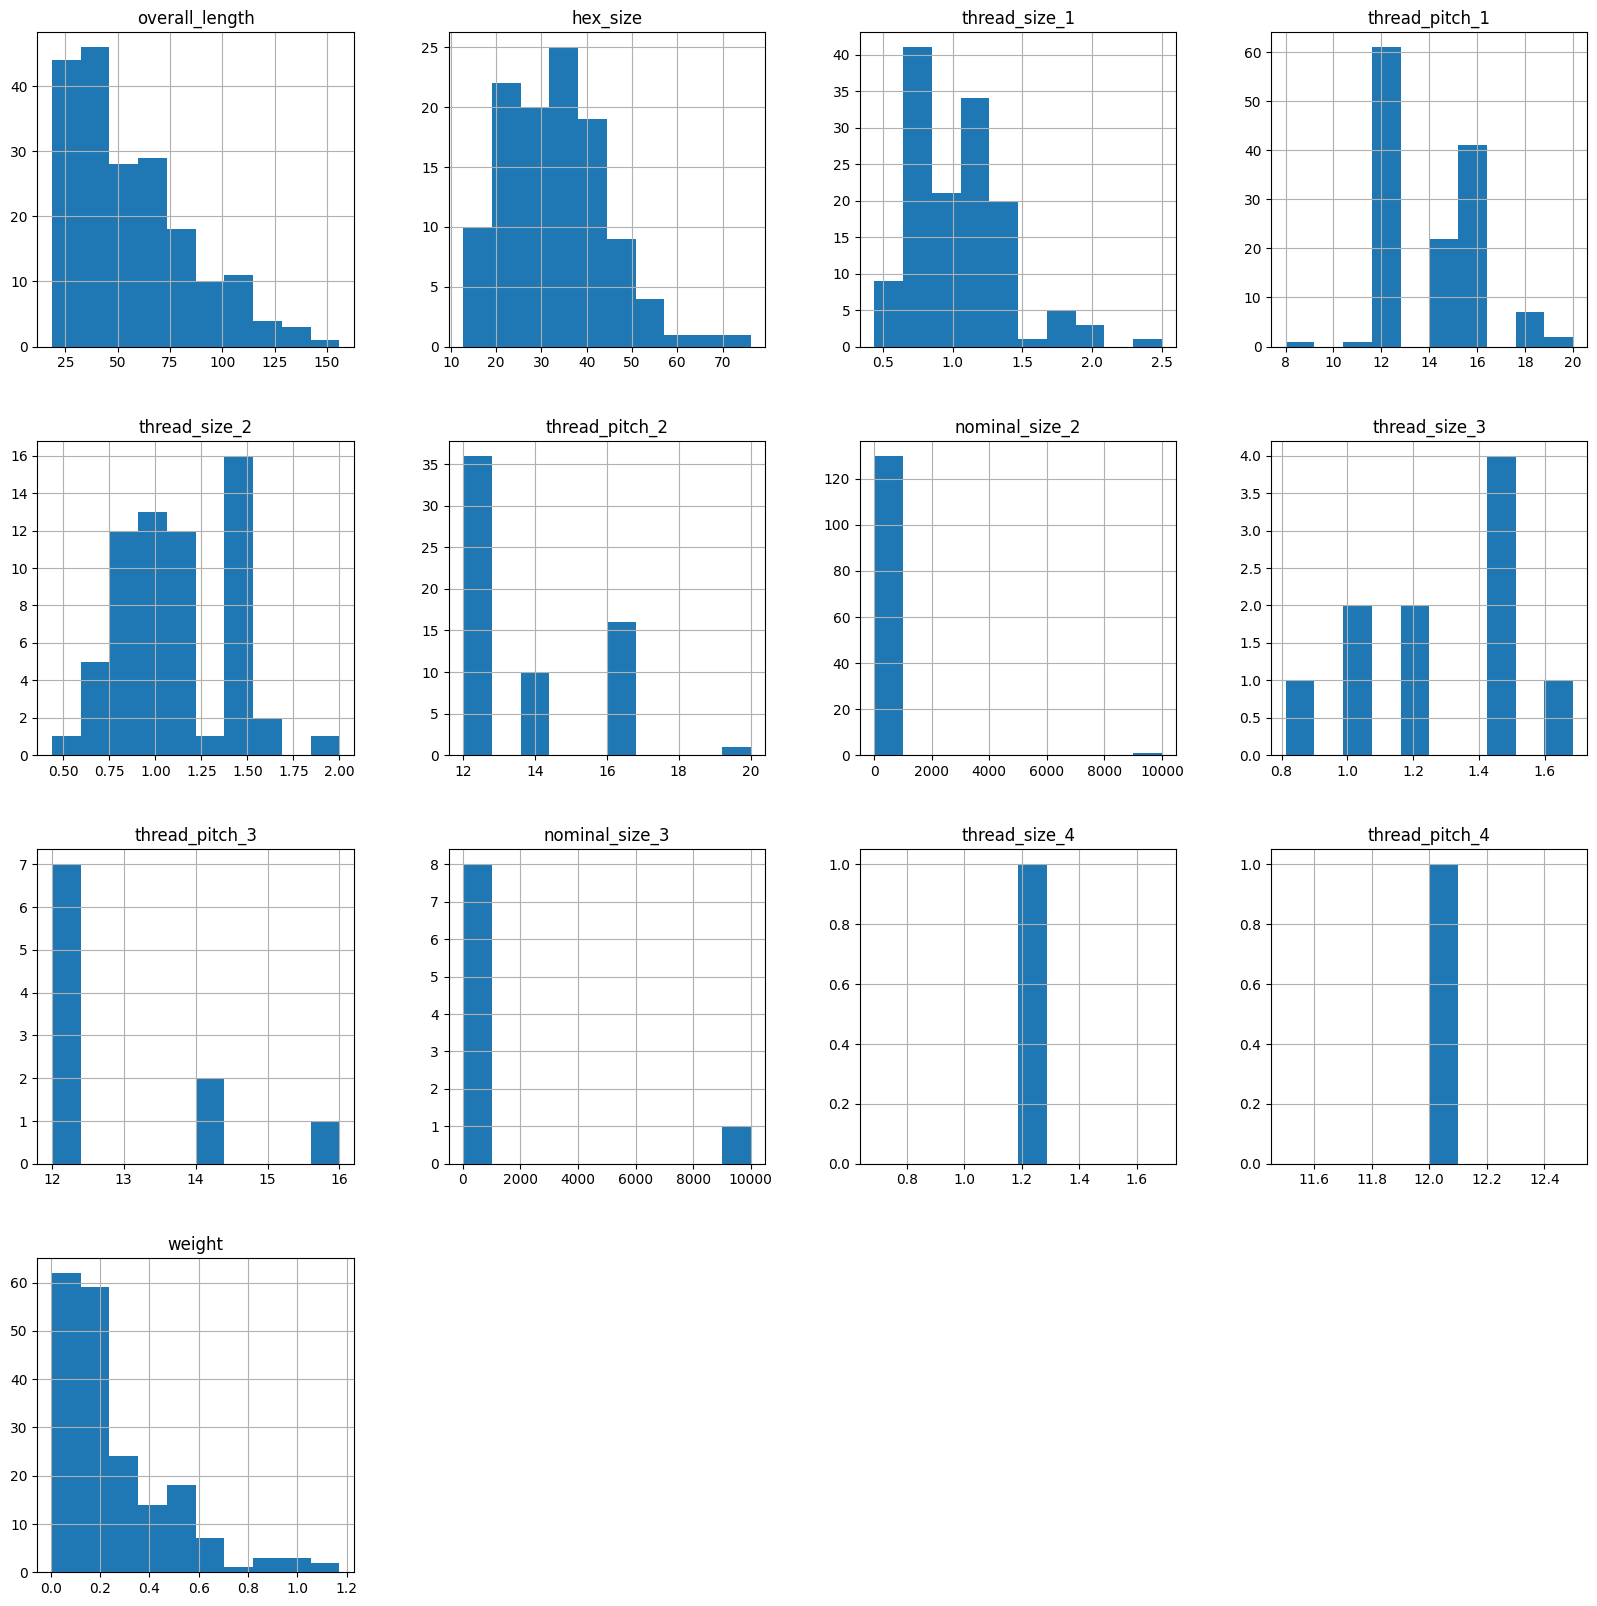

In [278]:
comp_threaded.hist(figsize=(20, 20))
plt.show()

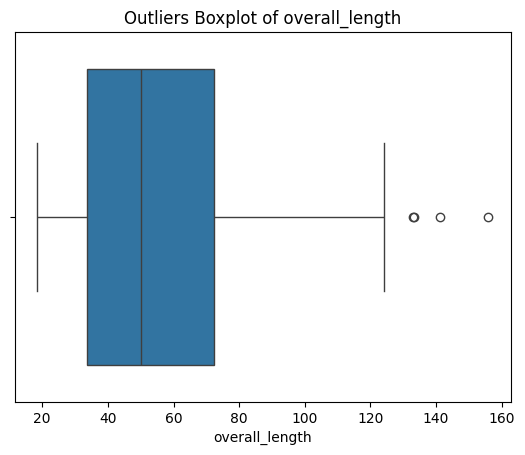

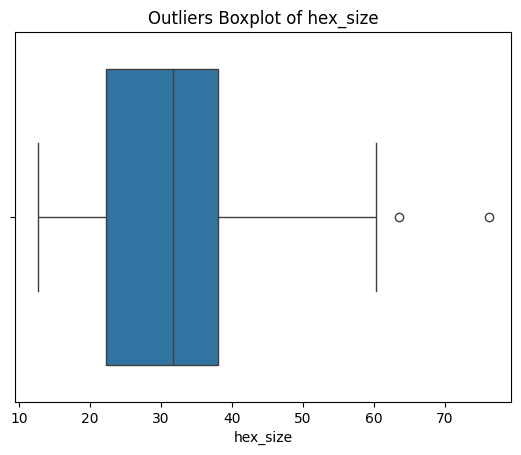

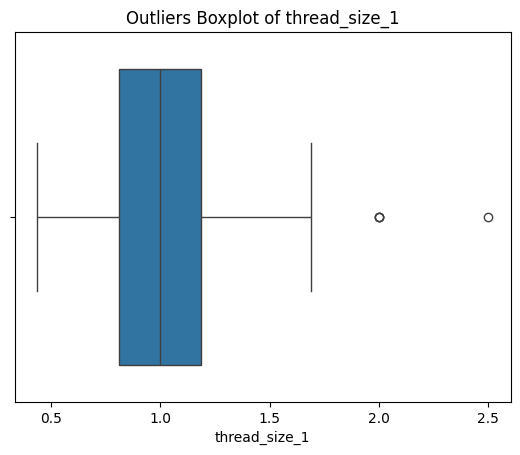

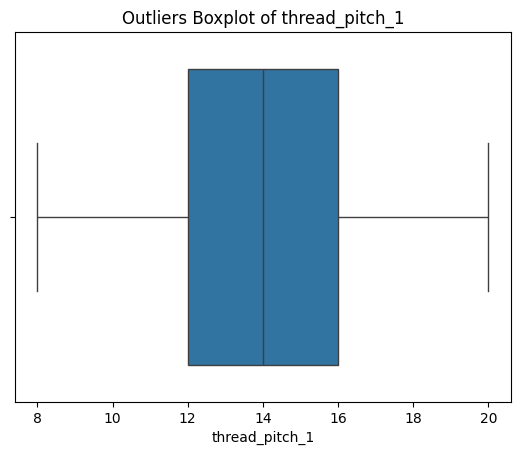

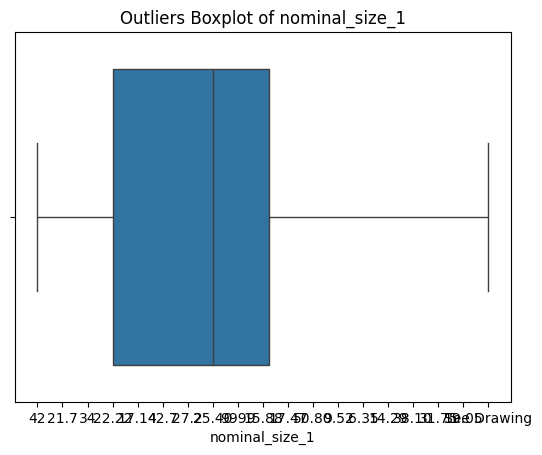

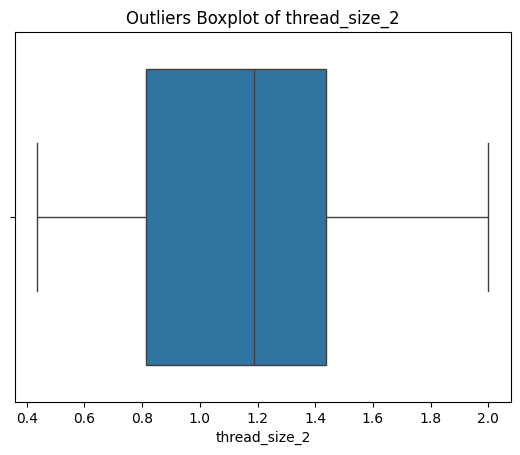

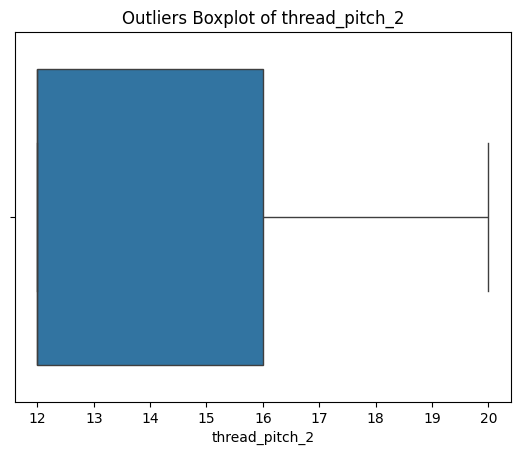

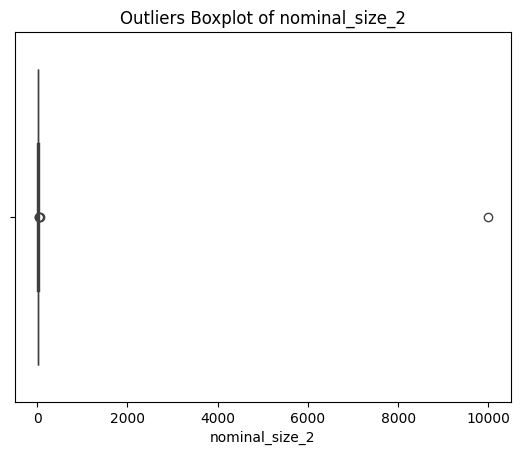

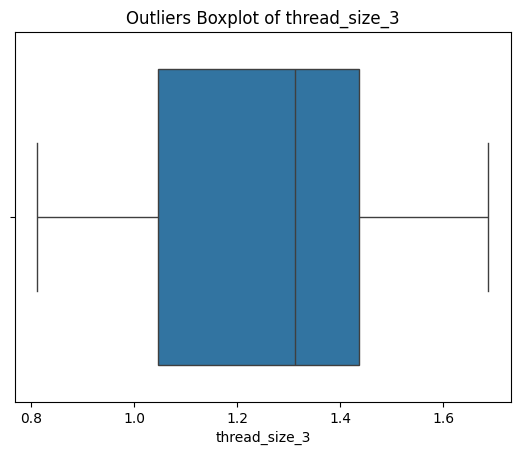

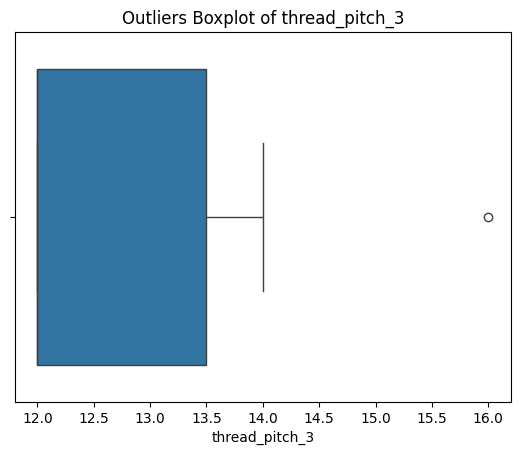

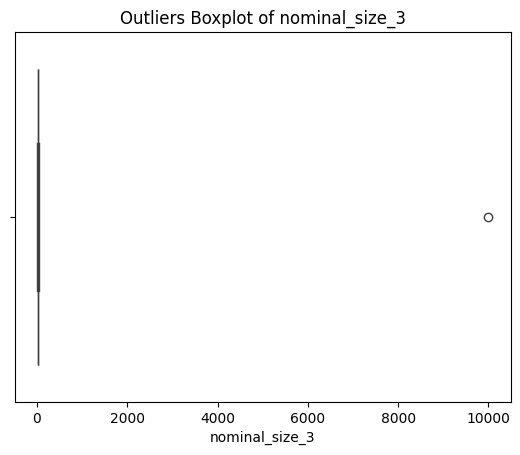

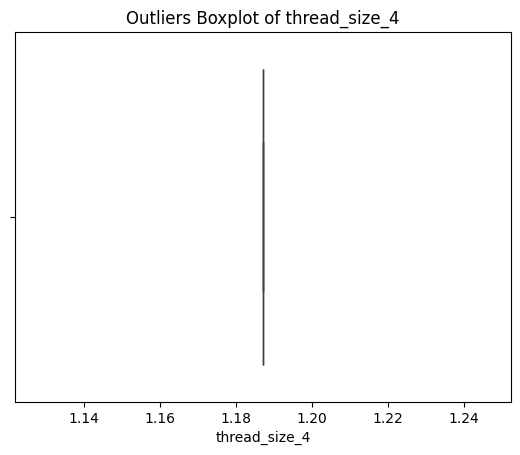

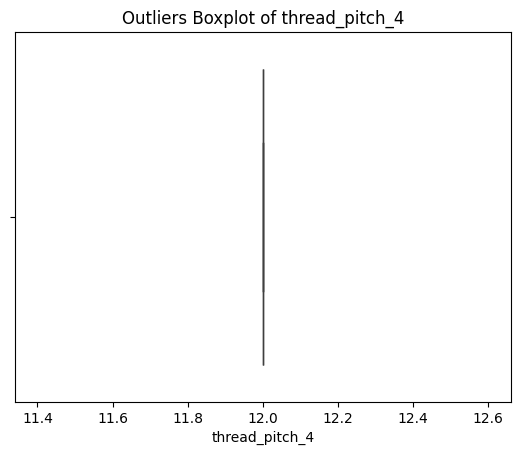

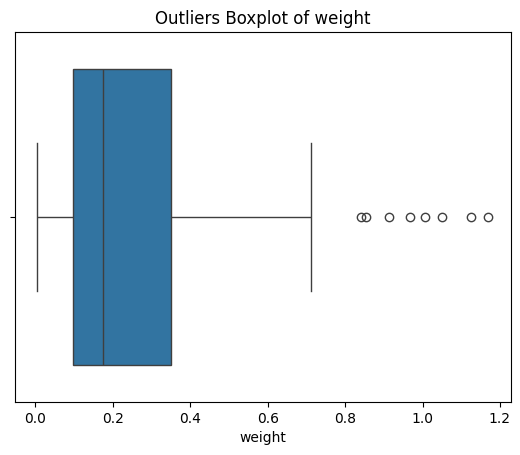

In [279]:
plot_outliers(comp_threaded)

In [280]:
outliers_detection(comp_threaded)

----------------------------------------------------------------------
 The UpperBound is  :  130.52499999999998
overall_length
----------------------------------------------------------------------
   component_id  overall_length  hex_size  thread_size_1  thread_pitch_1  \
74       C-0805           155.9       NaN            NaN             NaN   

   nominal_size_1  thread_size_2  thread_pitch_2  nominal_size_2  \
74          25.40          0.812            16.0             NaN   

    thread_size_3  thread_pitch_3  nominal_size_3  thread_size_4  \
74          1.437            12.0             NaN            NaN   

    thread_pitch_4  weight  
74             NaN   1.125  
----------------------------------------------------------------------
 The UpperBound is  :  61.92
hex_size
----------------------------------------------------------------------
   component_id  overall_length  hex_size  thread_size_1  thread_pitch_1  \
67       C-0651            72.4      76.2            2.5    

In [281]:
comp_threaded.drop(comp_threaded.index[[40, 90]], inplace=True)

In [282]:
comp_threaded.shape

(192, 15)

In [283]:
# components
components.shape

(2048, 3)

In [284]:
components.head()

,component_id,name,component_type_id
0,9999,OTHER,OTHER
1,C-0001,SLEEVE,CP-024
2,C-0002,SLEEVE,CP-024
3,C-0003,SLEEVE-FLARED,CP-024
4,C-0004,NUT,CP-026


In [285]:
# specs
specs.shape

(21198, 11)

In [286]:
specs.head()

,tube_assembly_id,spec1,spec2,spec3,spec4,spec5,spec6,spec7,spec8,spec9,spec10
0,TA-00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TA-00002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TA-00003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TA-00004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TA-00005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [287]:
specs.isnull().sum().sum()

182359

In [288]:
specs.isnull().sum()

tube_assembly_id        0
spec1               14069
spec2               14354
spec3               15358
spec4               17044
spec5               18277
spec6               19127
spec7               20663
spec8               21092
spec9               21178
spec10              21197
dtype: int64

In [289]:
# tube
tube.shape

(21198, 16)

In [290]:
tube.head()

,tube_assembly_id,material_id,diameter,wall,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other
0,TA-00001,SP-0035,12.70,1.65,164.0,5,38.10,N,N,N,N,EF-003,EF-003,0,0,0
1,TA-00002,SP-0019,6.35,0.71,137.0,8,19.05,N,N,N,N,EF-008,EF-008,0,0,0
2,TA-00003,SP-0019,6.35,0.71,127.0,7,19.05,N,N,N,N,EF-008,EF-008,0,0,0
3,TA-00004,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
4,TA-00005,SP-0029,19.05,1.24,109.0,4,50.80,N,N,N,N,EF-003,EF-003,0,0,0


In [291]:
tube.isnull().sum().sum()

279

In [292]:
tube.drop(['material_id', 'end_a_1x', 'end_a_2x', 'end_x_1x', 'end_x_2x',
           'end_a', 'end_x', 'num_boss', 'num_bracket', 'other'],
           axis = 1, inplace = True)

tube.head()

,tube_assembly_id,diameter,wall,length,num_bends,bend_radius
0,TA-00001,12.70,1.65,164.0,5,38.10
1,TA-00002,6.35,0.71,137.0,8,19.05
2,TA-00003,6.35,0.71,127.0,7,19.05
3,TA-00004,6.35,0.71,137.0,9,19.05
4,TA-00005,19.05,1.24,109.0,4,50.80


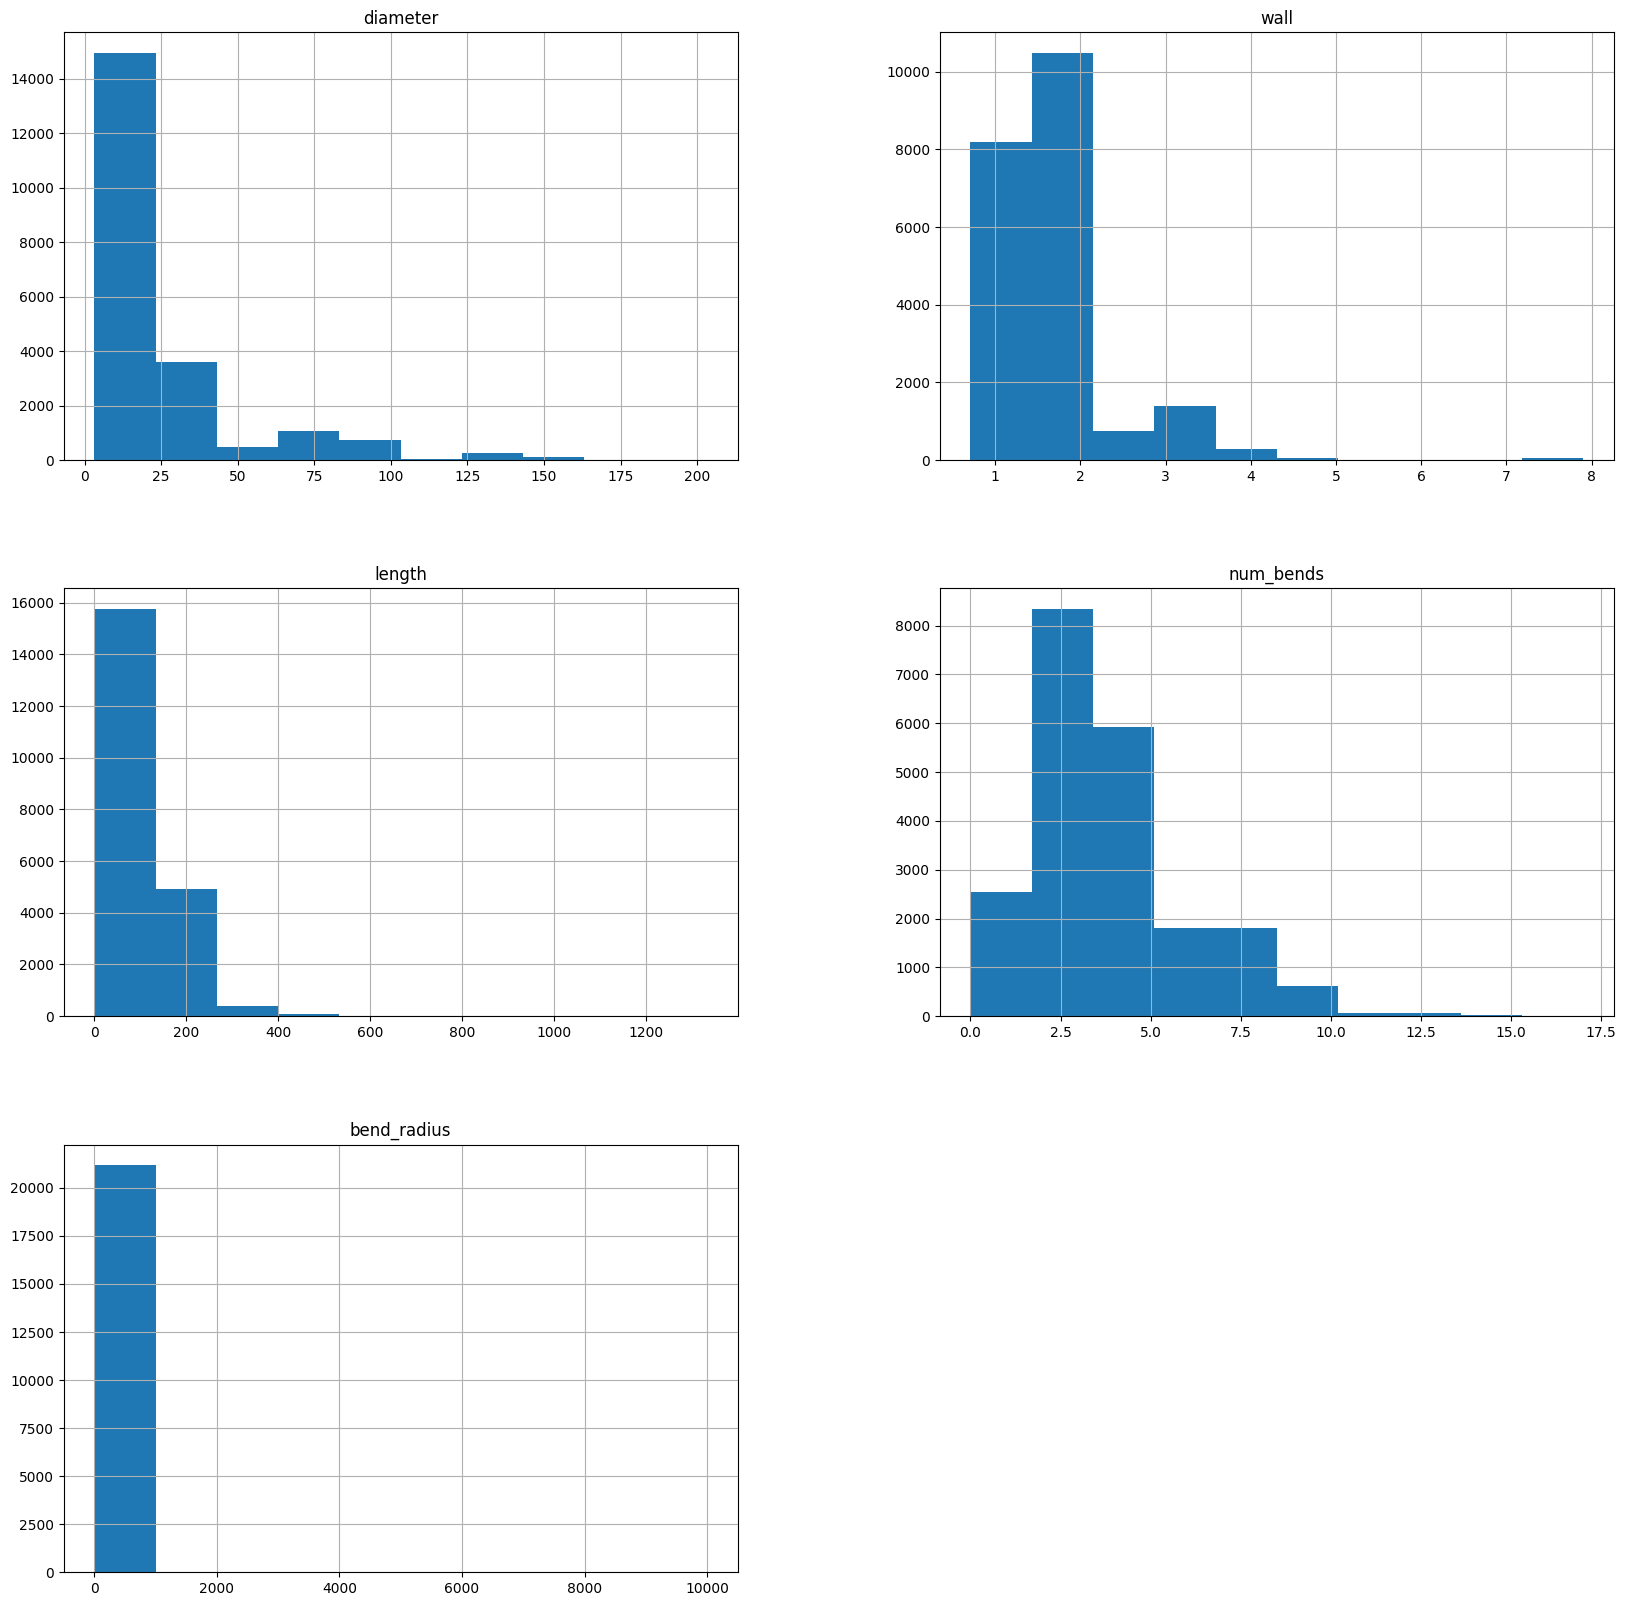

In [293]:
tube.hist(figsize=(20, 20))

plt.show()

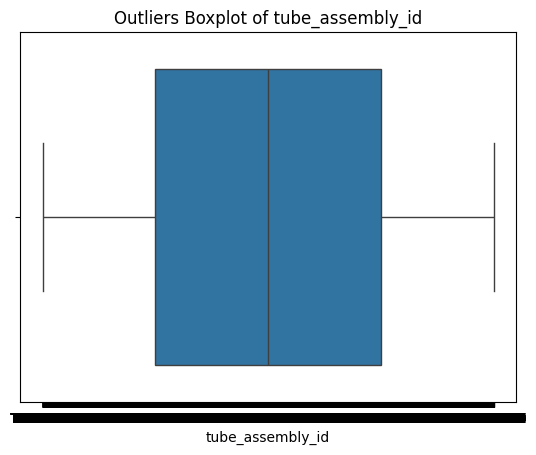

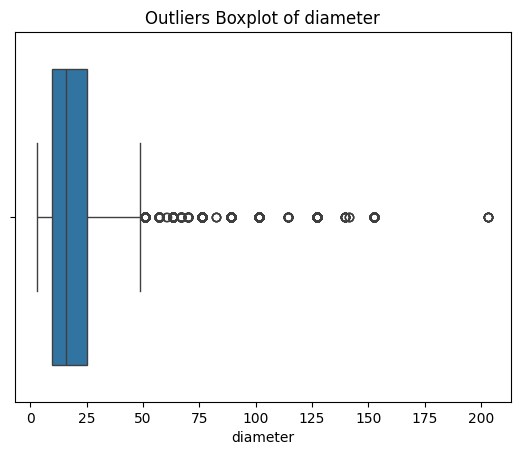

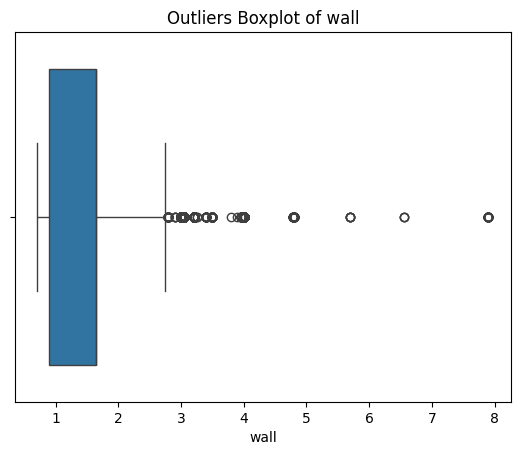

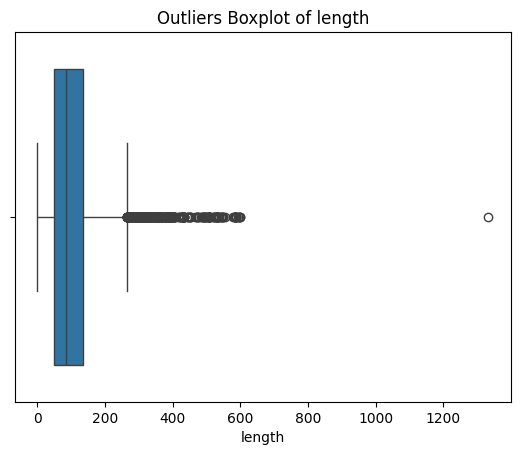

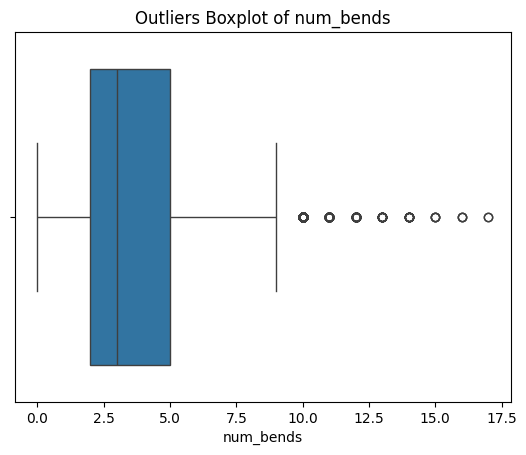

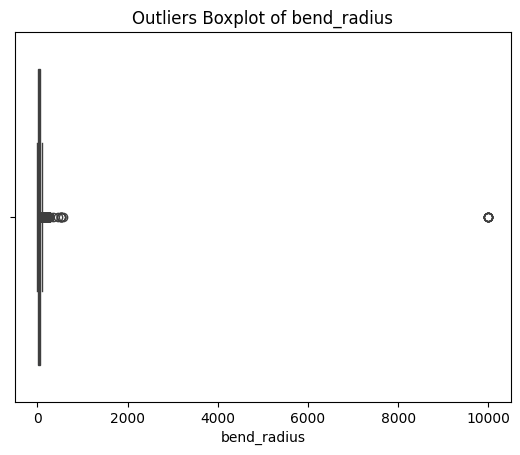

In [294]:
plot_outliers(tube)

In [295]:
outliers_detection(tube)

----------------------------------------------------------------------
 The UpperBound is  :  49.22
diameter
----------------------------------------------------------------------
      tube_assembly_id  diameter  wall  length  num_bends  bend_radius
11306         TA-11307     203.2   1.9    62.0          0          0.0
11309         TA-11310     203.2   1.9    48.0          0          0.0
11341         TA-11342     203.2   1.9    40.0          0          0.0
13049         TA-13050     203.2   1.9    70.0          0          0.0
14709         TA-14710     203.2   1.9    64.0          0          0.0
15619         TA-15620     203.2   1.9    26.0          0          0.0
16762         TA-16763     203.2   1.9   129.0          2        203.2
17421         TA-17422     203.2   1.9    22.0          0          0.0
----------------------------------------------------------------------
 The UpperBound is  :  2.79
wall
----------------------------------------------------------------------
      

In [296]:
tube.drop(tube.index[[17688, 17689, 18002, 18003, 15132, 15174,
           15175, 17688, 17689, 18002, 18003, 19320]],
          inplace=True)

tube.shape

(21190, 6)

In [297]:
# tube_end_form
tube_end_form.shape

(27, 2)

In [298]:
tube_end_form.head()

,end_form_id,forming
0,EF-001,Yes
1,EF-002,No
2,EF-003,No
3,EF-004,No
4,EF-005,Yes


In [299]:
# type_component
type_component.shape

(29, 2)

In [300]:
type_component.head()

,component_type_id,name
0,CP-001,4-bolt Tig Straight
1,CP-002,4-bolt MJ Straight
2,CP-003,4-bolt Braze/Weld Straight
3,CP-004,2-bolt Braze/Weld Straight
4,CP-005,2-bolt MJ Straight


In [301]:
# type_connection
type_connection.shape

(14, 2)

In [302]:
type_connection.head()

,connection_type_id,name
0,B-001,37 deg Flare-SAE J514
1,B-002,ORFS-SAE J1453
2,B-003,Hi-Duty
3,B-004,NPTF-SAE J476/J514
4,B-005,SAE STOR-SAE J1926


In [303]:
# type_end_form
type_end_form.shape

(8, 2)

In [304]:
type_end_form

,end_form_id,name
0,A-001,Male (Stud)
1,A-002,Male (Swivel)
2,A-003,Braze-Weld Boss
3,A-004,Braze-Weld Socket
4,A-005,Swivel Nut
5,A-006,Bulkhead Male
6,A-007,Port
7,9999,Other


> Below  files contain only has text descriptions :

- components

- tube_end_form

- type_component

- type_connection

- type_end_form


### *Let's not to use them*

### *Data Preparation*

In [305]:
train_set.shape

(30213, 8)

In [306]:
test_set.shape

(30235, 8)

In [307]:
train_set.head()

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost
0,TA-00002,S-0066,2013-07-07,0,0,Yes,1,21.905933
1,TA-00002,S-0066,2013-07-07,0,0,Yes,2,12.341214
2,TA-00002,S-0066,2013-07-07,0,0,Yes,5,6.601826
3,TA-00002,S-0066,2013-07-07,0,0,Yes,10,4.687770
4,TA-00002,S-0066,2013-07-07,0,0,Yes,25,3.541561


In [308]:
test_set.head()

,id,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity
0,1,TA-00001,S-0066,2013-06-23,0,0,Yes,1
1,2,TA-00001,S-0066,2013-06-23,0,0,Yes,2
2,3,TA-00001,S-0066,2013-06-23,0,0,Yes,5
3,4,TA-00001,S-0066,2013-06-23,0,0,Yes,10
4,5,TA-00001,S-0066,2013-06-23,0,0,Yes,25


In [309]:
# Create several features from dates for additional information.

train_set['quote_date'] = pd.to_datetime(train_set['quote_date'])

train_set['year'] = train_set['quote_date'].dt.year
train_set['month'] = train_set['quote_date'].dt.month
train_set['dayofyear'] = train_set['quote_date'].dt.dayofyear
train_set['dayofweek'] = train_set['quote_date'].dt.dayofweek
train_set['day'] = train_set['quote_date'].dt.day

test_set['quote_date'] = pd.to_datetime(test_set['quote_date'])

test_set['year'] = test_set['quote_date'].dt.year
test_set['month'] = test_set['quote_date'].dt.month
test_set['dayofyear'] = test_set['quote_date'].dt.dayofyear
test_set['dayofweek'] = test_set['quote_date'].dt.dayofweek
test_set['day'] = test_set['quote_date'].dt.day

train_set = train_set.drop('quote_date', axis=1)
test_set = test_set.drop('quote_date', axis=1)


In [310]:
train_set.head()

,tube_assembly_id,supplier,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,year,month,dayofyear,dayofweek,day
0,TA-00002,S-0066,0,0,Yes,1,21.905933,2013,7,188,6,7
1,TA-00002,S-0066,0,0,Yes,2,12.341214,2013,7,188,6,7
2,TA-00002,S-0066,0,0,Yes,5,6.601826,2013,7,188,6,7
3,TA-00002,S-0066,0,0,Yes,10,4.687770,2013,7,188,6,7
4,TA-00002,S-0066,0,0,Yes,25,3.541561,2013,7,188,6,7


In [311]:
test_set.head()

,id,tube_assembly_id,supplier,annual_usage,min_order_quantity,bracket_pricing,quantity,year,month,dayofyear,dayofweek,day
0,1,TA-00001,S-0066,0,0,Yes,1,2013,6,174,6,23
1,2,TA-00001,S-0066,0,0,Yes,2,2013,6,174,6,23
2,3,TA-00001,S-0066,0,0,Yes,5,2013,6,174,6,23
3,4,TA-00001,S-0066,0,0,Yes,10,2013,6,174,6,23
4,5,TA-00001,S-0066,0,0,Yes,25,2013,6,174,6,23


In [312]:
# Combine all the info files in one file

all_files = [comp_adaptor, comp_boss, comp_elbow, comp_float, comp_hfl, comp_nut, comp_other, comp_sleeve, comp_straight, comp_tee, comp_threaded]

comp_all = pd.concat(all_files)

comp_all.head()

,component_id,overall_length,thread_size_1,thread_pitch_1,nominal_size_1,thread_size_2,thread_pitch_2,nominal_size_2,hex_size,weight,...,length,thread_size,thread_pitch,intended_nut_thread,intended_nut_pitch,thread_size_3,thread_pitch_3,nominal_size_3,thread_size_4,thread_pitch_4
0,C-0005,58.4,1.312,12.0,NaN,1.000,11.5,NaN,34.93,0.206,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C-0006,34.8,0.437,20.0,NaN,0.750,16.0,NaN,22.20,0.083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C-1435,20.3,NaN,NaN,15.88,0.875,18.0,NaN,22.22,0.023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C-1546,26.4,0.125,27.0,NaN,0.125,27.0,NaN,15.88,0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C-1583,44.5,1.312,12.0,NaN,1.062,12.0,NaN,38.10,0.256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [313]:
comp_all.shape

(2033, 29)

In [314]:
comp_all.isnull().sum().sum()

51363

In [315]:
comp_all.isnull().sum()

component_id              0
overall_length         1640
thread_size_1          1884
thread_pitch_1         1884
nominal_size_1         1966
thread_size_2          1950
thread_pitch_2         1950
nominal_size_2         1901
hex_size               1907
weight                   69
height_over_tube       1887
bolt_pattern_long      1552
bolt_pattern_wide      1671
extension_length       1860
thickness              1482
drop_length            1859
elbow_angle            1904
hose_diameter          2027
hex_nut_size           1991
length                 1926
thread_size            1968
thread_pitch           1968
intended_nut_thread    1991
intended_nut_pitch     1991
thread_size_3          2023
thread_pitch_3         2023
nominal_size_3         2025
thread_size_4          2032
thread_pitch_4         2032
dtype: int64

In [316]:
comp_all = comp_all[['component_id', 'weight', 'length', 'overall_length', 'thickness']]

comp_all.head()

,component_id,weight,length,overall_length,thickness
0,C-0005,0.206,NaN,58.4,NaN
1,C-0006,0.083,NaN,34.8,NaN
2,C-1435,0.023,NaN,20.3,NaN
3,C-1546,0.026,NaN,26.4,NaN
4,C-1583,0.256,NaN,44.5,NaN


In [317]:
# Combine two length columns and drop one.

comp_all['length'] = comp_all['length'].fillna(0)
comp_all['overall_length'] = comp_all['overall_length'].fillna(0)

comp_all['length'] = comp_all['length'] + comp_all['overall_length']

comp_all = comp_all.drop(['overall_length'], axis=1)

comp_all['weight'] = comp_all['weight'].fillna(0)
comp_all['thickness'] = comp_all['thickness'].fillna(0)

comp_all.head()

,component_id,weight,length,thickness
0,C-0005,0.206,58.4,0.0
1,C-0006,0.083,34.8,0.0
2,C-1435,0.023,20.3,0.0
3,C-1546,0.026,26.4,0.0
4,C-1583,0.256,44.5,0.0


In [318]:
# Add the information about tube to the main train and test file
train_set = pd.merge(train_set, tube, on='tube_assembly_id', how='left')

test_set = pd.merge(test_set, tube, on='tube_assembly_id', how='left')

print(f"Train set after merging 'tube' set  :  {train_set.shape}")
print(f"Test set after merging 'tube' set  :  {test_set.shape}")

Train set after merging 'tube' set  :  (30213, 17)
Test set after merging 'tube' set  :  (30235, 17)


In [319]:
# Add the information about bill_of_meterials to the main train and test file
train_set = pd.merge(train_set, bill_of_materials, on='tube_assembly_id', how='left')

test_set = pd.merge(test_set, bill_of_materials, on='tube_assembly_id', how='left')

print(f"Train set after merging 'bill_of_meterials' set  :  {train_set.shape}")
print(f"Test set after merging 'bill_of_meterials' set  :  {test_set.shape}")

Train set after merging 'bill_of_meterials' set  :  (30213, 33)
Test set after merging 'bill_of_meterials' set  :  (30235, 33)


In [320]:
# Rename length column so that it'll different from length of components
train_set.rename(columns={'length': 'length_t'}, inplace=True)

test_set.rename(columns={'length': 'length_t'}, inplace=True)

In [321]:
# Merging to get information about all components

# for i in range(1, 9, 2):
#   suffix1 = '_' + str(i)
#   suffix2 = '_' + str(i + 1)

#   component_1 = "component_id" + suffix1
#   component_2 = "component_id" + suffix2

#   train_set = pd.merge(train_set, comp_all, left_on=component_1,
#                        right_on='component_id', how='left')
#   train_set = pd.merge(train_set, comp_all, left_on=component_2,
#                        right_on='component_id', suffixes=(suffix1, suffix2),
#                        how='left')

#   test_set = pd.merge(test_set, comp_all, left_on=component_1,
#                       right_on='component_id', how='left')
#   test_set = pd.merge(test_set, comp_all, left_on=component_2,
#                       right_on='component_id', suffixes=(suffix1, suffix2),
#                       how='left')

# print(f"Train set after merging 'comp_all' set  :  {train_set.shape}")
# print(f"Test set after merging 'comp_all' set  :  {test_set.shape}")

In [322]:
# Check if comp_all has 'component_id' column
for i in range(1, 9, 2):
    suffix1 = '_' + str(i)
    suffix2 = '_' + str(i + 1)

    component_1 = "component_id" + suffix1
    component_2 = "component_id" + suffix2

    print(f"Merging for suffixes {suffix1} and {suffix2}")

    # Merge for train_set
    train_set = pd.merge(train_set, comp_all, left_on=component_1,
                         right_on='component_id', how='left',
                         suffixes=('', suffix1))
    print(f"Train set shape after merging component {component_1}: {train_set.shape}")
    print(f"Train set columns: {train_set.columns.tolist()}")

    train_set = pd.merge(train_set, comp_all, left_on=component_2,
                         right_on='component_id', how='left',
                         suffixes=('', suffix2))
    print(f"Train set shape after merging component {component_2}: {train_set.shape}")
    print(f"Train set columns: {train_set.columns.tolist()}")

    # Merge for test_set
    test_set = pd.merge(test_set, comp_all, left_on=component_1,
                        right_on='component_id', how='left',
                        suffixes=('', suffix1))
    print(f"Test set shape after merging component {component_1}: {test_set.shape}")
    print(f"Test set columns: {test_set.columns.tolist()}")

    test_set = pd.merge(test_set, comp_all, left_on=component_2,
                        right_on='component_id', how='left',
                        suffixes=('', suffix2))
    print(f"Test set shape after merging component {component_2}: {test_set.shape}")
    print(f"Test set columns: {test_set.columns.tolist()}")

print(f"Final Train set shape: {train_set.shape}")
print(f"Final Test set shape: {test_set.shape}")


Merging for suffixes _1 and _2
Train set shape after merging component component_id_1: (30213, 37)
Train set columns: ['tube_assembly_id', 'supplier', 'annual_usage', 'min_order_quantity', 'bracket_pricing', 'quantity', 'cost', 'year', 'month', 'dayofyear', 'dayofweek', 'day', 'diameter', 'wall', 'length_t', 'num_bends', 'bend_radius', 'component_id_1', 'quantity_1', 'component_id_2', 'quantity_2', 'component_id_3', 'quantity_3', 'component_id_4', 'quantity_4', 'component_id_5', 'quantity_5', 'component_id_6', 'quantity_6', 'component_id_7', 'quantity_7', 'component_id_8', 'quantity_8', 'component_id', 'weight', 'length', 'thickness']
Train set shape after merging component component_id_2: (30213, 41)
Train set columns: ['tube_assembly_id', 'supplier', 'annual_usage', 'min_order_quantity', 'bracket_pricing', 'quantity', 'cost', 'year', 'month', 'dayofyear', 'dayofweek', 'day', 'diameter', 'wall', 'length_t', 'num_bends', 'bend_radius', 'component_id_1', 'quantity_1', 'component_id_2', 

In [323]:
train_set.head()

,tube_assembly_id,supplier,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,year,month,dayofyear,...,length_6,thickness_6,component_id_7,weight_7,length_7,thickness_7,component_id_8,weight_8,length_8,thickness_8
0,TA-00002,S-0066,0,0,Yes,1,21.905933,2013,7,188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TA-00002,S-0066,0,0,Yes,2,12.341214,2013,7,188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TA-00002,S-0066,0,0,Yes,5,6.601826,2013,7,188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TA-00002,S-0066,0,0,Yes,10,4.687770,2013,7,188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TA-00002,S-0066,0,0,Yes,25,3.541561,2013,7,188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [324]:
train_set.isnull().sum().sum()

1160972

In [325]:
train_set.isnull().sum()

tube_assembly_id          0
supplier                  0
annual_usage              0
min_order_quantity        0
bracket_pricing           0
                      ...  
thickness_7           30205
component_id_8        30210
weight_8              30210
length_8              30210
thickness_8           30210
Length: 65, dtype: int64

In [326]:
train_set.drop(['component_id_1', 'component_id_2', 'component_id_3',
                'component_id_4', 'component_id_5', 'component_id_6',
                'component_id_7', 'component_id_8'], axis=1, inplace=True)

test_set.drop(['component_id_1', 'component_id_2', 'component_id_3',
                'component_id_4', 'component_id_5', 'component_id_6',
                'component_id_7', 'component_id_8'], axis=1, inplace=True)

In [327]:
print(f"Shape of Train set after removing some columns  :  {train_set.shape}\n")

train_set.head()

Shape of Train set after removing some columns  :  (30213, 50)



,tube_assembly_id,supplier,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,year,month,dayofyear,...,thickness_5,weight_6,length_6,thickness_6,weight_7,length_7,thickness_7,weight_8,length_8,thickness_8
0,TA-00002,S-0066,0,0,Yes,1,21.905933,2013,7,188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TA-00002,S-0066,0,0,Yes,2,12.341214,2013,7,188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TA-00002,S-0066,0,0,Yes,5,6.601826,2013,7,188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TA-00002,S-0066,0,0,Yes,10,4.687770,2013,7,188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TA-00002,S-0066,0,0,Yes,25,3.541561,2013,7,188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [328]:
# Add descriptive information about specs.

train_set = pd.merge(train_set, specs, on='tube_assembly_id', how='left')

test_set = pd.merge(test_set, specs, on='tube_assembly_id', how='left')

In [329]:
train_set.head()

,tube_assembly_id,supplier,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,year,month,dayofyear,...,spec1,spec2,spec3,spec4,spec5,spec6,spec7,spec8,spec9,spec10
0,TA-00002,S-0066,0,0,Yes,1,21.905933,2013,7,188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TA-00002,S-0066,0,0,Yes,2,12.341214,2013,7,188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TA-00002,S-0066,0,0,Yes,5,6.601826,2013,7,188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TA-00002,S-0066,0,0,Yes,10,4.687770,2013,7,188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TA-00002,S-0066,0,0,Yes,25,3.541561,2013,7,188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [330]:
# Calculate various additional features on physical parameters. They turned out to be useful.

length_columns = [col for col in list(train_set.columns) if 'length' in col]
weight_columns = [col for col in list(train_set.columns) if 'weight' in col]
thickness_collumns = [col for col in list(train_set.columns) if 'thickness' in col]

train_set['avg_w'] = train_set[weight_columns].mean(axis=1)
train_set['avg_l'] = train_set[length_columns].mean(axis=1)
train_set['avg_th'] = train_set[thickness_collumns].mean(axis=1)
train_set['min_w'] = train_set[weight_columns].min(axis=1)
train_set['min_l'] = train_set[length_columns].min(axis=1)
train_set['min_th'] = train_set[thickness_collumns].min(axis=1)
train_set['max_w'] = train_set[weight_columns].max(axis=1)
train_set['max_l'] = train_set[length_columns].max(axis=1)
train_set['max_th'] = train_set[thickness_collumns].max(axis=1)
train_set['tot_w'] = train_set[weight_columns].sum(axis=1)
train_set['tot_l'] = train_set[length_columns].sum(axis=1)
train_set['tot_th'] = train_set[thickness_collumns].sum(axis=1)

test_set['avg_w'] = test_set[weight_columns].mean(axis=1)
test_set['avg_l'] = test_set[length_columns].mean(axis=1)
test_set['avg_th'] = test_set[thickness_collumns].mean(axis=1)
test_set['min_w'] = test_set[weight_columns].min(axis=1)
test_set['min_l'] = test_set[length_columns].min(axis=1)
test_set['min_th'] = test_set[thickness_collumns].min(axis=1)
test_set['max_w'] = test_set[weight_columns].max(axis=1)
test_set['max_l'] = test_set[length_columns].max(axis=1)
test_set['max_th'] = test_set[thickness_collumns].max(axis=1)
test_set['tot_w'] = test_set[weight_columns].sum(axis=1)
test_set['tot_l'] = test_set[length_columns].sum(axis=1)
test_set['tot_th'] = test_set[thickness_collumns].sum(axis=1)


In [331]:
train_set.head()

,tube_assembly_id,supplier,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,year,month,dayofyear,...,avg_th,min_w,min_l,min_th,max_w,max_l,max_th,tot_w,tot_l,tot_th
0,TA-00002,S-0066,0,0,Yes,1,21.905933,2013,7,188,...,0.0,0.009,14.2,0.0,0.009,137.0,0.0,0.009,151.2,0.0
1,TA-00002,S-0066,0,0,Yes,2,12.341214,2013,7,188,...,0.0,0.009,14.2,0.0,0.009,137.0,0.0,0.009,151.2,0.0
2,TA-00002,S-0066,0,0,Yes,5,6.601826,2013,7,188,...,0.0,0.009,14.2,0.0,0.009,137.0,0.0,0.009,151.2,0.0
3,TA-00002,S-0066,0,0,Yes,10,4.687770,2013,7,188,...,0.0,0.009,14.2,0.0,0.009,137.0,0.0,0.009,151.2,0.0
4,TA-00002,S-0066,0,0,Yes,25,3.541561,2013,7,188,...,0.0,0.009,14.2,0.0,0.009,137.0,0.0,0.009,151.2,0.0


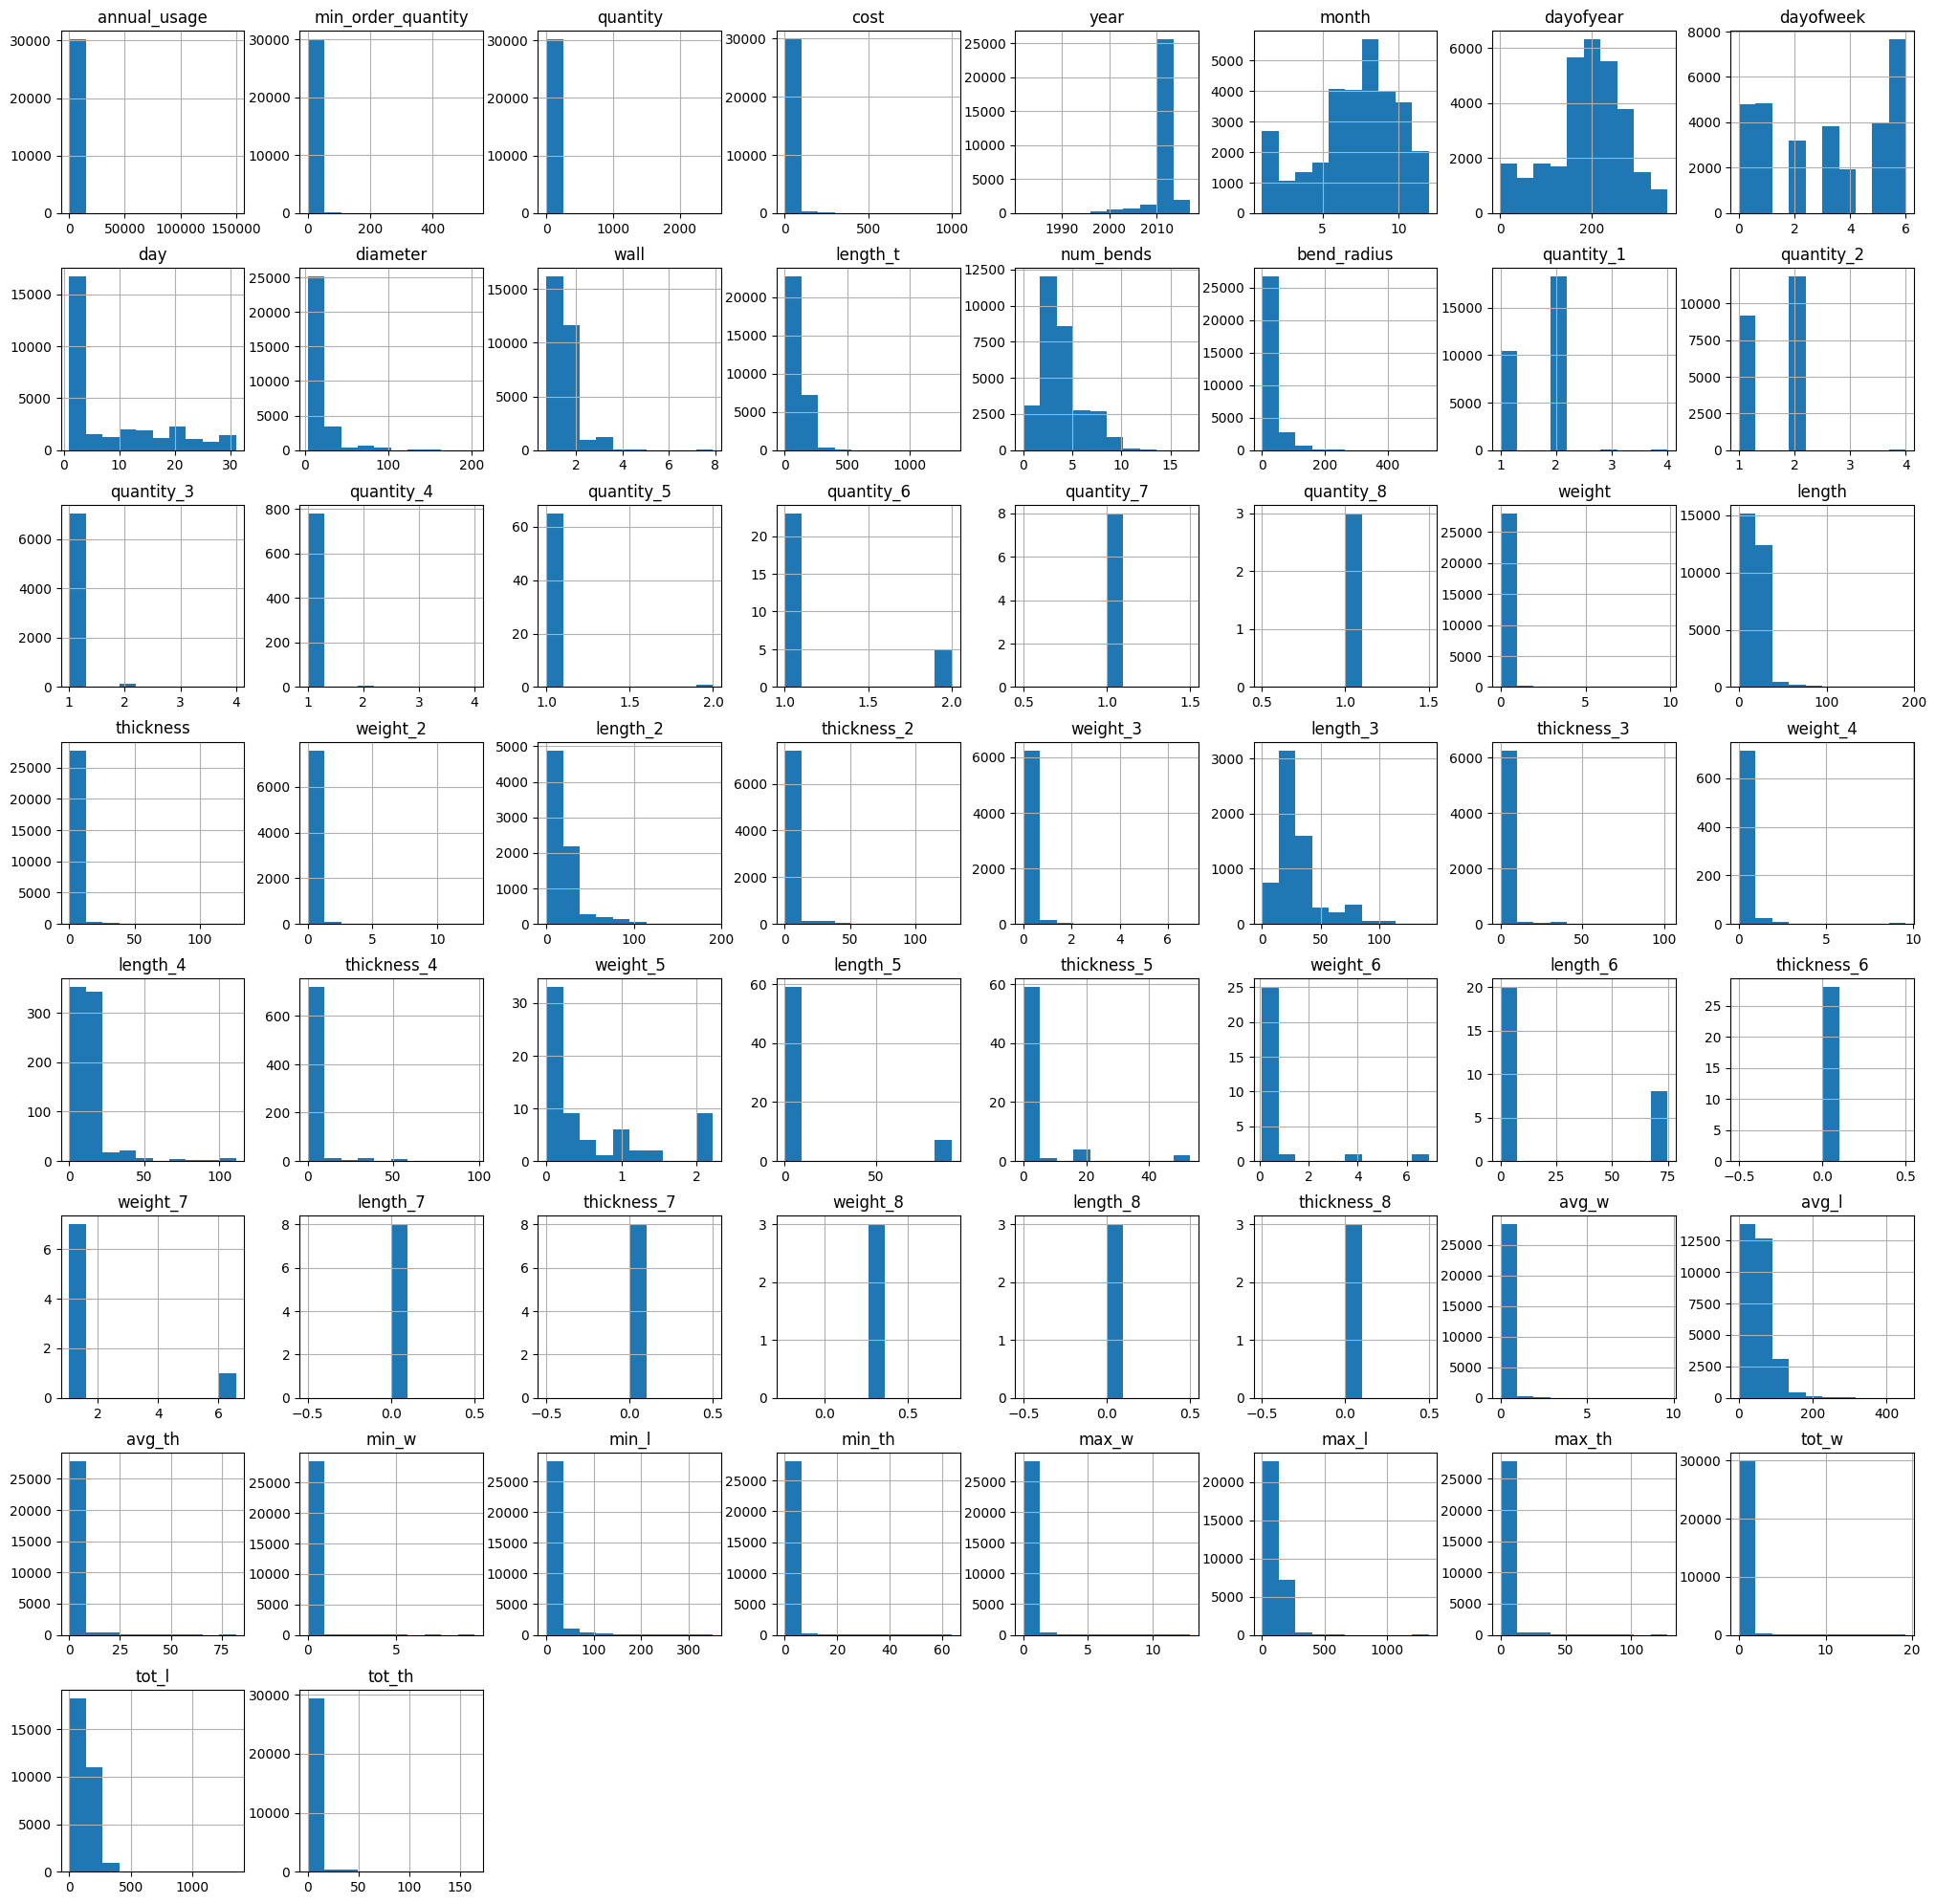

In [332]:
feature_names = [col for col in train_set.columns if train_set[col].dtype != 'object']

train_set[feature_names].hist(figsize=(25,25))

plt.show()

In [333]:
from scipy.stats import skew

In [334]:
# Take log of skewered columns to smooth them and fill NA.

for col in train_set.columns:
  if train_set[col].dtype != 'object':
    if skew(train_set[col]) > 0.75:
      train_set[col] = np.log1p(train_set[col])
      train_set[col] = train_set[col].apply(lambda x: 0 if x == -np.inf else x)

    train_set[col] = train_set[col].fillna(0)


for col in test_set.columns:
  if test_set[col].dtype != 'object':
    if skew(test_set[col]) > 0.75:
      test_set[col] = np.log1p(test_set[col])
      test_set[col] = test_set[col].apply(lambda x: 0 if x == -np.inf else x)

    test_set[col] = test_set[col].fillna(0)


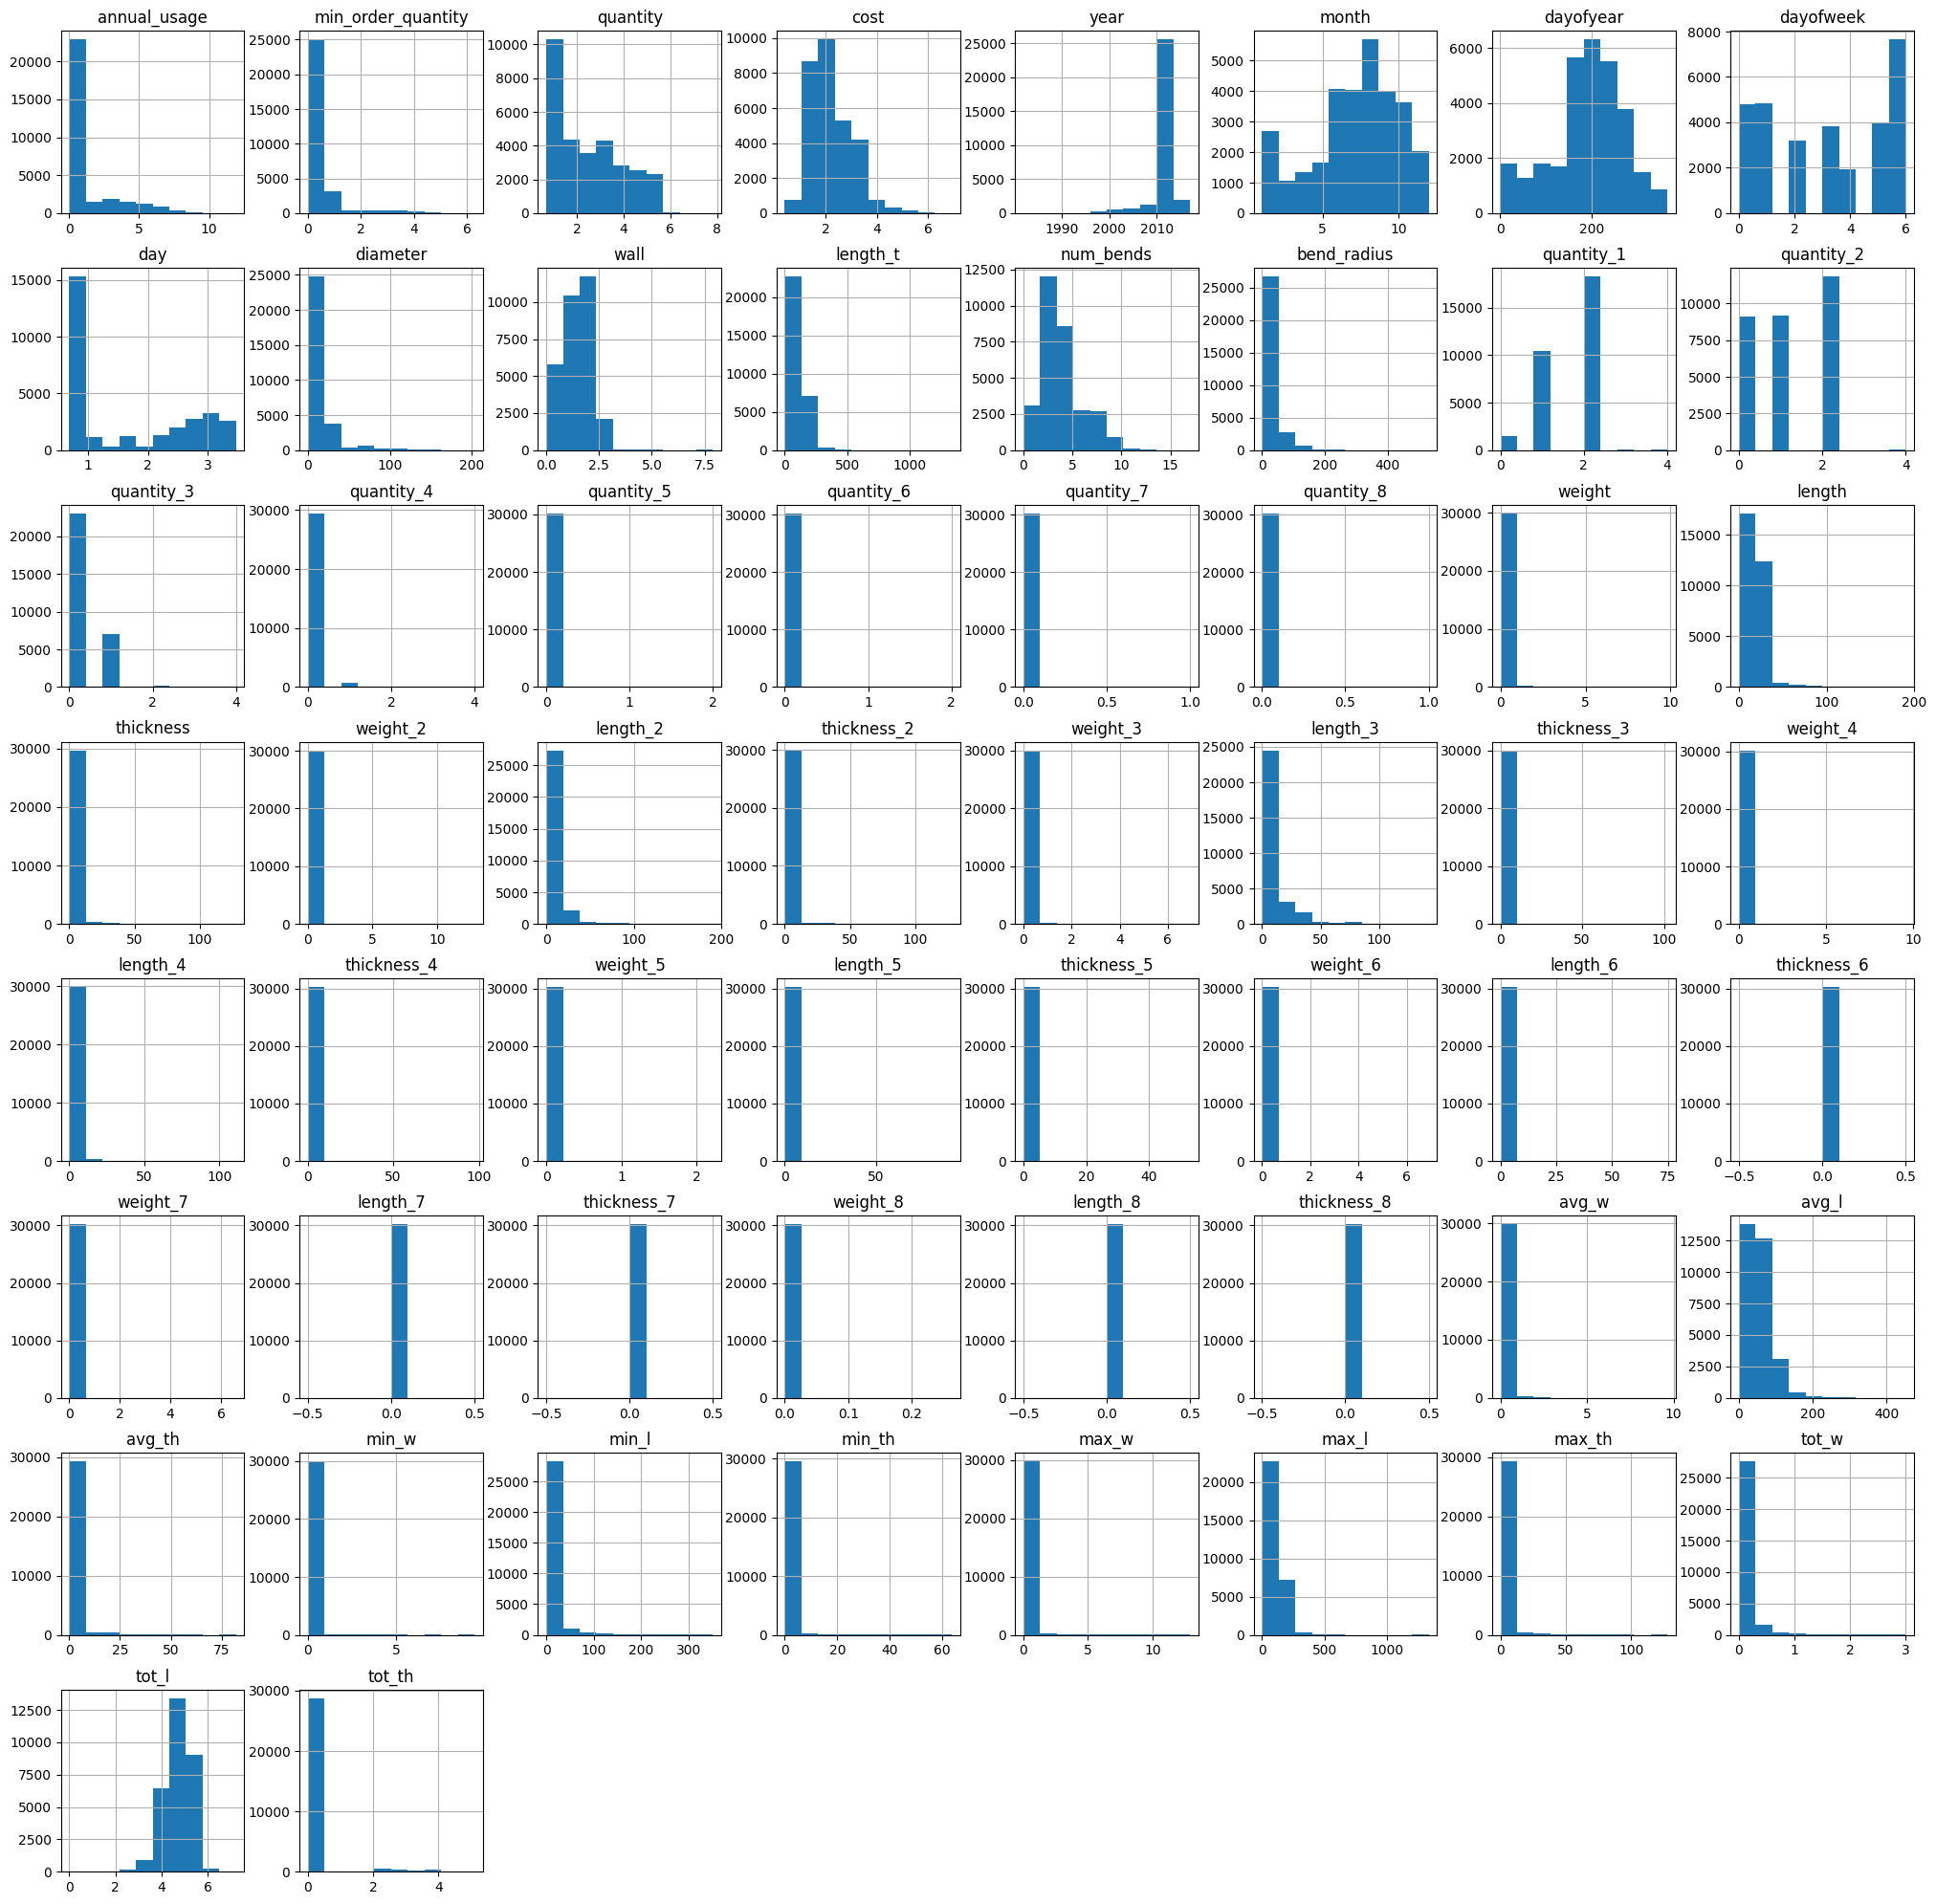

In [335]:
feature_names = [col for col in train_set.columns if train_set[col].dtype != 'object']

train_set[feature_names].hist(figsize=(25,25))

plt.show()

In [336]:
for col in train_set.columns:
  if train_set[col].dtype == 'object':
    train_set[col].replace(np.nan, " ", regex=True, inplace=True)

for col in test_set.columns:
  if test_set[col].dtype == 'object':
    test_set[col].replace(np.nan, " ", regex=True, inplace=True)

In [337]:
train_set.isnull().sum().sum()

0

In [338]:
train_set.head()

,tube_assembly_id,supplier,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,year,month,dayofyear,...,avg_th,min_w,min_l,min_th,max_w,max_l,max_th,tot_w,tot_l,tot_th
0,TA-00002,S-0066,0.0,0.0,Yes,0.693147,3.131396,2013,7,188,...,0.0,0.009,14.2,0.0,0.009,137.0,0.0,0.00896,5.025195,0.0
1,TA-00002,S-0066,0.0,0.0,Yes,1.098612,2.590858,2013,7,188,...,0.0,0.009,14.2,0.0,0.009,137.0,0.0,0.00896,5.025195,0.0
2,TA-00002,S-0066,0.0,0.0,Yes,1.791759,2.028389,2013,7,188,...,0.0,0.009,14.2,0.0,0.009,137.0,0.0,0.00896,5.025195,0.0
3,TA-00002,S-0066,0.0,0.0,Yes,2.397895,1.738318,2013,7,188,...,0.0,0.009,14.2,0.0,0.009,137.0,0.0,0.00896,5.025195,0.0
4,TA-00002,S-0066,0.0,0.0,Yes,3.258097,1.513271,2013,7,188,...,0.0,0.009,14.2,0.0,0.009,137.0,0.0,0.00896,5.025195,0.0


In [339]:
print(f"Shape of final train set  :  {train_set.shape}")
print(f"Shape of final test set  :  {test_set.shape}")

Shape of final train set  :  (30213, 72)
Shape of final test set  :  (30235, 72)


In [340]:
X_train = train_set.drop('cost', axis = 1)
Y_train = train_set['cost']

In [341]:
test_set.head()

,id,tube_assembly_id,supplier,annual_usage,min_order_quantity,bracket_pricing,quantity,year,month,dayofyear,...,avg_th,min_w,min_l,min_th,max_w,max_l,max_th,tot_w,tot_l,tot_th
0,1,TA-00001,S-0066,0.0,0.0,Yes,0.693147,2013,6,174,...,0.0,0.036,20.0,0.0,0.036,164.0,0.0,0.035367,5.220356,0.0
1,2,TA-00001,S-0066,0.0,0.0,Yes,1.098612,2013,6,174,...,0.0,0.036,20.0,0.0,0.036,164.0,0.0,0.035367,5.220356,0.0
2,3,TA-00001,S-0066,0.0,0.0,Yes,1.791759,2013,6,174,...,0.0,0.036,20.0,0.0,0.036,164.0,0.0,0.035367,5.220356,0.0
3,4,TA-00001,S-0066,0.0,0.0,Yes,2.397895,2013,6,174,...,0.0,0.036,20.0,0.0,0.036,164.0,0.0,0.035367,5.220356,0.0
4,5,TA-00001,S-0066,0.0,0.0,Yes,3.258097,2013,6,174,...,0.0,0.036,20.0,0.0,0.036,164.0,0.0,0.035367,5.220356,0.0


In [342]:
X_test = test_set.drop('id', axis=1)

In [343]:
X_test.head()

,tube_assembly_id,supplier,annual_usage,min_order_quantity,bracket_pricing,quantity,year,month,dayofyear,dayofweek,...,avg_th,min_w,min_l,min_th,max_w,max_l,max_th,tot_w,tot_l,tot_th
0,TA-00001,S-0066,0.0,0.0,Yes,0.693147,2013,6,174,6,...,0.0,0.036,20.0,0.0,0.036,164.0,0.0,0.035367,5.220356,0.0
1,TA-00001,S-0066,0.0,0.0,Yes,1.098612,2013,6,174,6,...,0.0,0.036,20.0,0.0,0.036,164.0,0.0,0.035367,5.220356,0.0
2,TA-00001,S-0066,0.0,0.0,Yes,1.791759,2013,6,174,6,...,0.0,0.036,20.0,0.0,0.036,164.0,0.0,0.035367,5.220356,0.0
3,TA-00001,S-0066,0.0,0.0,Yes,2.397895,2013,6,174,6,...,0.0,0.036,20.0,0.0,0.036,164.0,0.0,0.035367,5.220356,0.0
4,TA-00001,S-0066,0.0,0.0,Yes,3.258097,2013,6,174,6,...,0.0,0.036,20.0,0.0,0.036,164.0,0.0,0.035367,5.220356,0.0


In [344]:
print(f"Shape of final X_train set  :  {X_train.shape}")
print(f"Shape of final X_test set  :  {X_test.shape}")

Shape of final X_train set  :  (30213, 71)
Shape of final X_test set  :  (30235, 71)


In [345]:
feat_names_O = [col for col in X_train.columns if X_train[col].dtype == 'O']
feat_index_O = [X_train.columns.get_loc(c) for c in feat_names_O if c in X_train]

print(f"Feature Names  :  {feat_names_O}\n")
print(f"Feature Indexes  :  {feat_index_O}")

Feature Names  :  ['tube_assembly_id', 'supplier', 'bracket_pricing', 'component_id', 'spec1', 'spec2', 'spec3', 'spec4', 'spec5', 'spec6', 'spec7', 'spec8', 'spec9', 'spec10']

Feature Indexes  :  [0, 1, 4, 24, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58]


In [346]:
# Convert Dataframes To Array for Easier Transform
X_train = np.array(X_train)
X_test = np.array(X_test)

In [347]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

for i in feat_index_O:
  lbl_enc = LabelEncoder()
  lbl_enc.fit(list(X_train[:,i]) + list(X_test[:,i]))
  X_train[:,i] = lbl_enc.transform(X_train[:,i])
  X_test[:,i] = lbl_enc.transform(X_test[:,i])


In [348]:
X_train

array([[1, 41, 0.0, ..., 0.008959741371471904, 5.025195445427586, 0.0],
       [1, 41, 0.0, ..., 0.008959741371471904, 5.025195445427586, 0.0],
       [1, 41, 0.0, ..., 0.008959741371471904, 5.025195445427586, 0.0],
       ...,
       [17706, 27, 0.6931471805599453, ..., 0.11154137473290741,
        4.465908118654584, 2.5649493574615367],
       [17707, 39, 6.0473721790462776, ..., 0.0, 3.912023005428146, 0.0],
       [17708, 17, 1.3862943611198906, ..., 0.21913552991667093,
        4.328098292648326, 3.380994674344636]], dtype=object)

In [349]:
X_test

array([[0, 41, 0.0, ..., 0.035367143837291316, 5.220355825078325, 0.0],
       [0, 41, 0.0, ..., 0.035367143837291316, 5.220355825078325, 0.0],
       [0, 41, 0.0, ..., 0.035367143837291316, 5.220355825078325, 0.0],
       ...,
       [17705, 27, 6.784457062637643, ..., 0.24216155714997162,
        5.15732967324706, 0.0],
       [17709, 17, 3.367295829986474, ..., 0.0, 4.1588830833596715, 0.0],
       [17710, 17, 3.367295829986474, ..., 0.0, 4.8283137373023015, 0.0]],
      dtype=object)

In [350]:
# Convert to float dtype as XGB needs float only
X_train = X_train.astype(float)
X_test = X_test.astype(float)

### Model Building and Evaluation

In [355]:
from math import sqrt

from sklearn.model_selection import train_test_split, GridSearchCV

from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [353]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train,
                                                    test_size=0.2,
                                                    random_state=42)

print(f"Training Data Size  :  {x_train.shape}")
print(f"Testing Data Size  :  {x_test.shape}")
print(f"Training Label Size  :  {y_train.shape}")
print(f"Testing Label Size  :  {y_test.shape}")

Training Data Size  :  (24170, 71)
Testing Data Size  :  (6043, 71)
Training Label Size  :  (24170,)
Testing Label Size  :  (6043,)


In [354]:
params = {
    'n_estimators': [100, 500, 1000, 1500],
    'max_depth': [2, 4, 6, 8]
}

xgb_tree = XGBRegressor(
    eta = 0.1,
    min_child_weight = 2,
    subsample = 0.8,
    colsample_bytree = 0.8,
    tree_method = 'exact',
    reg_alpha = 0.05,
    silent = 0,
    random_state = 1023
)

grid = GridSearchCV(
    estimator=xgb_tree,
    param_grid=params,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=10,
)

grid_res = grid.fit(x_train, y_train)
best_params = grid_res.best_params_

print(f"Best parameters are  :  {best_params}")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters are  :  {'max_depth': 6, 'n_estimators': 1500}


In [357]:
pred = grid_res.predict(x_test)

mse = mean_squared_error(np.exp(y_test), np.exp(pred))
rmse = sqrt(mse)
mae = mean_absolute_error(np.exp(y_test), np.exp(pred))
r2 = r2_score(np.exp(y_test), np.exp(pred))

print(f"Mean Squard Error  :  {mse}")
print(f"Root Mean Squard Error  :  {rmse}")
print(f"Mean Absolute Error  :  {mae}")
print(f"R2 Score  :  {r2}")

Mean Squard Error  :  78.2611685702203
Root Mean Squard Error  :  8.84653426886599
Mean Absolute Error  :  1.7961361541409109
R2 Score  :  0.8835384971148557


In [359]:

outputDF = pd.concat([np.exp(y_test).reset_index(drop='True'),
                      pd.DataFrame(np.exp(pred)).reset_index(drop='True')],
                    axis=1)
outputDF.columns = ['Original', 'Predicted']

outputDF['Diff'] = outputDF.Original - outputDF.Predicted

outputDF.head()

,Original,Predicted,Diff
0,121.733017,38.845581,82.887436
1,22.115828,21.778963,0.336865
2,5.534756,7.575987,-2.041231
3,8.225007,8.956585,-0.731578
4,7.112184,7.420637,-0.308453
